# Financial Developments' effect on Economic Growth of Pakistan
    - Data Preprocessing 
    - Nested Cross Validation 
    - OLS & Linear Regression
    - Regularization Methods
        - Recursive Feature Elimination
        - Elastic Net
    - Machine Learning Methods
        - Support Vector Machine (Regression)
        - Extra Trees
        - Decision Trees
        - Random Forests
        - Gradient Boosting Regression
        - AdaBoost Regression
    -Predictions

In [1]:
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' #Graphics in SVG format are more sharp and legible
import scipy.sparse
import warnings
import random

In [2]:
plt.style.use('seaborn-white') #for jupyter dark, change style
sns.set_style("darkgrid")

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.set_option('display.max_columns', None) 
econ = pd.read_excel('Data/Data.xlsx', sheet_name="final")

In [8]:
econ.head(15)

,Unnamed: 0,year,Year,RGDP,LInf,T,DL,PC,K,LRGDP,HDI,FDI,Rem,r,SEP,SES,SET,Fi,LFi
0,1,1972-01-01,1972,2.472902e+11,0.714601,28.756811,51.304524,29.1002,14.175515,11.393207,0.284690,0.182617,6.182868,0.153429,49.021820,16.601330,2.102710,4.371995,0.640680
1,2,1973-01-01,1973,1.454136e+11,1.363049,29.830460,47.197224,26.5334,12.930480,11.162605,0.290946,-0.063242,6.141886,-16.555917,51.338749,17.029539,2.114480,3.914025,0.592624
2,3,1974-01-01,1974,1.607967e+11,1.425910,34.457878,35.902385,20.5779,13.372018,11.206277,0.297201,0.045594,6.100904,-16.332202,53.693710,17.256830,2.115750,1.387990,0.142386
3,4,1975-01-01,1975,1.675685e+11,1.320240,33.246033,33.667894,19.1559,16.227531,11.224192,0.303457,0.220459,6.059922,-11.041176,54.060280,18.107830,2.074380,2.158307,0.334113
4,5,1976-01-01,1976,1.762086e+11,0.854811,30.095619,37.839394,21.9316,17.243338,11.246027,0.309713,0.061630,3.086834,2.206676,55.226318,17.961149,2.190410,0.774508,-0.110974
5,6,1977-01-01,1977,1.831648e+11,1.005737,28.305453,39.356253,23.4067,19.269707,11.262842,0.315969,0.100642,5.765458,0.734532,56.605461,17.992170,2.162580,1.278946,0.106852
6,7,1978-01-01,1978,1.979069e+11,0.788076,27.719820,40.035030,22.2597,17.858054,11.296461,0.322225,0.181106,7.347304,4.269641,49.914700,17.950300,2.285670,1.278932,0.106848
7,8,1979-01-01,1979,2.053451e+11,0.917350,33.449907,43.113080,24.8132,17.875138,11.312484,0.328481,0.295587,7.619334,0.557953,49.685452,16.506531,2.253770,0.704232,-0.152284
8,9,1980-01-01,1980,2.263226e+11,1.076940,36.587201,41.496793,23.4071,18.481801,11.354728,0.334737,0.268610,8.643515,-3.311564,49.136650,16.955980,2.198240,0.647911,-0.188484
9,10,1981-01-01,1981,2.442490e+11,1.074813,35.329488,39.014795,24.0395,18.774174,11.387833,0.340993,0.384635,7.356098,-2.607414,50.214809,16.981689,2.268779,1.204243,0.080714


In [9]:
econ.shape

(46, 19)

In [10]:
econ.dtypes

Unnamed: 0             int64
year          datetime64[ns]
Year                   int64
RGDP                 float64
LInf                 float64
T                    float64
DL                   float64
PC                   float64
K                    float64
LRGDP                float64
HDI                  float64
FDI                  float64
Rem                  float64
r                    float64
SEP                  float64
SES                  float64
SET                  float64
Fi                   float64
LFi                  float64
dtype: object

In [11]:
econ.columns

Index(['Unnamed: 0', 'year', 'Year', 'RGDP', 'LInf', 'T', 'DL', 'PC', 'K',
       'LRGDP', 'HDI', 'FDI', 'Rem', 'r', 'SEP', 'SES', 'SET', 'Fi', 'LFi'],
      dtype='object')

# Exploratory Analysis

In [12]:
stats = econ.describe()
stats

,Unnamed: 0,Year,RGDP,LInf,T,DL,PC,K,LRGDP,HDI,FDI,Rem,r,SEP,SES,SET,Fi,LFi
count,46.000000,46.000000,4.600000e+01,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,23.500000,1994.500000,1.612203e+11,0.893194,33.053430,45.677889,23.586561,17.460288,11.190976,0.425447,0.789550,5.260775,-0.509328,67.989690,25.997202,4.246542,1.586987,0.083125
std,13.422618,13.422618,4.462366e+10,0.240707,3.317675,6.232676,3.700552,1.884903,0.121250,0.084081,0.802445,2.142695,4.760515,17.000427,8.631742,2.777925,1.120860,0.341213
min,1.000000,1972.000000,1.032723e+11,0.403005,25.306232,33.667894,15.386100,12.930480,11.013984,0.284690,-0.063242,1.453638,-16.555917,49.021820,16.506531,2.074380,0.257340,-0.589492
25%,12.250000,1983.250000,1.175551e+11,0.754781,30.628534,40.268909,21.814525,16.127656,11.070236,0.355068,0.304553,3.488189,-2.140046,55.036847,18.263143,2.294363,0.721801,-0.141957
50%,23.500000,1994.500000,1.612902e+11,0.896668,33.289816,45.065655,24.182200,17.897167,11.207606,0.425500,0.587824,5.322999,0.753044,58.625750,24.478292,3.067666,1.241587,0.093781
75%,34.750000,2005.750000,2.020152e+11,1.067663,35.328879,50.943929,26.145025,18.929394,11.305354,0.503750,0.949232,6.927086,2.175694,87.085817,31.199555,4.963728,2.277460,0.357248
max,46.000000,2017.000000,2.472902e+11,1.425910,38.909495,58.867689,29.786100,20.818264,11.393207,0.562000,3.668323,10.247634,5.345072,97.709618,46.109180,10.354130,4.371995,0.640680


In [11]:
stats.to_csv("results.csv",index=False)

In [12]:
# count of duplicates
econ.duplicated().sum()
# display the duplicates now #econ[econ.duplicated()]

0

In [14]:
#Turns floats into integers and vice versa
intconv = lambda x: int(x) # : float(x)
#econ['year']= econ['year'].apply(intconv)

In [15]:
#correlation between numerical values and target variable: sale_dollars
corr = econ.corr()
print (corr['RGDP'].sort_values(ascending=False)[:15])

RGDP          1.000000
LRGDP         0.994021
PC            0.472597
K             0.468828
Rem           0.405031
T             0.330695
LInf          0.130179
r            -0.060921
Fi           -0.133794
FDI          -0.374782
DL           -0.550206
SET          -0.666437
SES          -0.750917
HDI          -0.792510
Unnamed: 0   -0.804622
Name: RGDP, dtype: float64


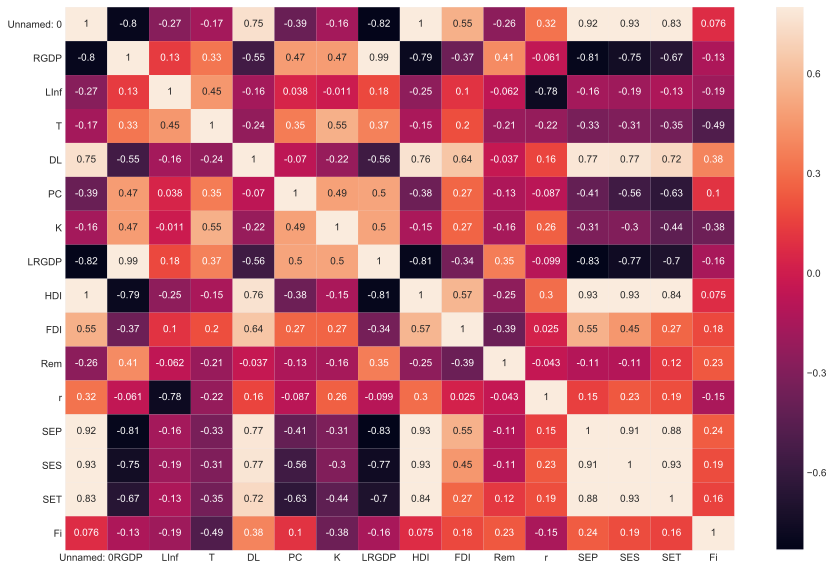

In [16]:
#correlation matrix
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 10))
correlation= sns.heatmap(corr, vmax=.8, annot_kws={'size': 10}, annot=True);
correlation

In [17]:
figure = correlation.get_figure()    
figure.savefig('correlation.png', dpi=400)
# plt.savefig('svm_conf.png', dpi=400)  #OR

c:\users\mahum\appdata\local\programs\python\python35\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Year')

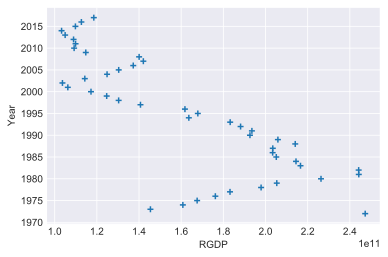

In [18]:
# plotting relationship to see if any outliers exist
plt.scatter(x=econ['RGDP'], y=econ['year'], marker='+')
plt.xlabel('RGDP')
plt.ylabel('Year')

Text(0.5, 1.0, "Real GDP's distribution ")

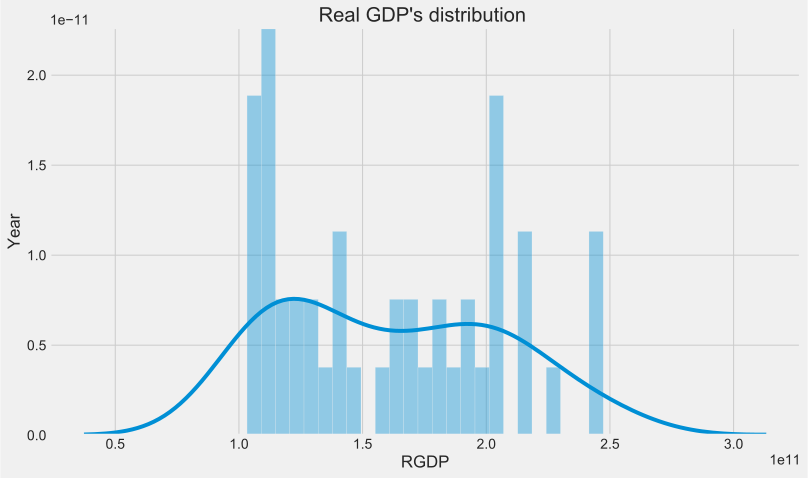

In [13]:
#Distribution of target variable: GDP
plt.style.use('fivethirtyeight')
hist = plt.figure(figsize=(12,7))
sns.distplot(econ['RGDP'], bins = 25)
plt.xlabel("RGDP"), plt.ylabel("Year")
plt.title("Real GDP's distribution ")
# hist.savefig('Hist_GDP.png')

Text(0.5, 1.0, "Logged Real GDP's distribution ")

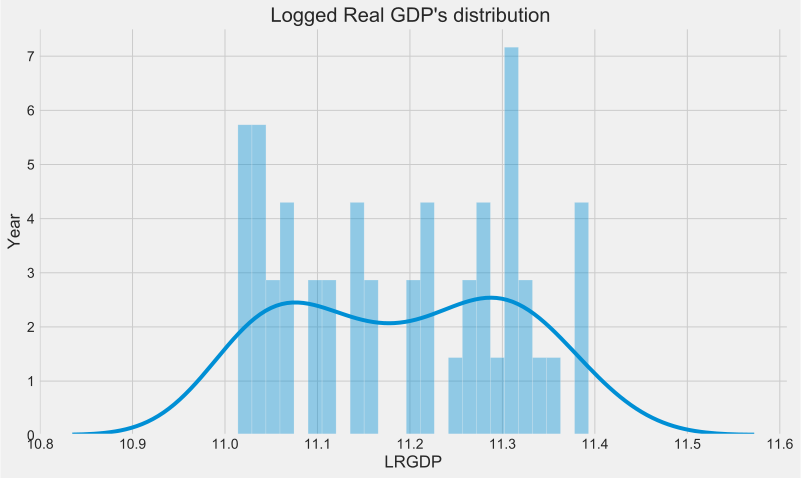

In [20]:
#Distribution of target variable: GDP
plt.style.use('fivethirtyeight')
hist = plt.figure(figsize=(12,7))
sns.distplot(econ['LRGDP'], bins = 25)
plt.xlabel("LRGDP"), plt.ylabel("Year")
plt.title("Logged Real GDP's distribution ")
# hist.savefig('Hist_GDP.png')

C:\Miniconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Year')

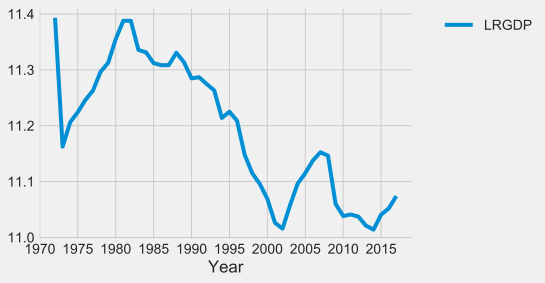

In [14]:
plt.plot( 'year', 'LRGDP', data = econ)
plt.axis(option = 'square')
plt.legend(bbox_to_anchor=(1, 0,0.35,1))
#plt.xlabel('GDP current US$ , Gross capita formation US$')
plt.xlabel('Year')

C:\Miniconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Second argument 'r' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


Text(0.5, 0, 'Year')

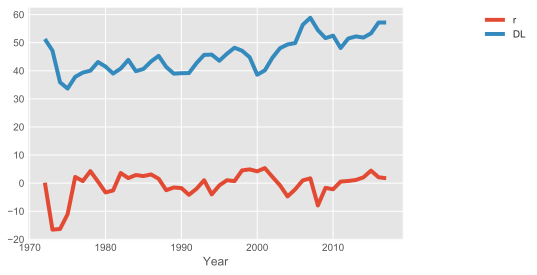

In [16]:
plt.style.use('ggplot')
plt.plot('Year', 'r', data= econ), plt.plot('Year', 'DL', data= econ),  
plt.axis(option = 'square')
plt.legend(bbox_to_anchor=(1, 0,0.35,1))
#plt.xlabel('GDP current US$ , Gross capita formation US$')
plt.xlabel('Year') 

c:\users\mahum\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Second argument 'r' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


Text(0.5, 0, 'Year')

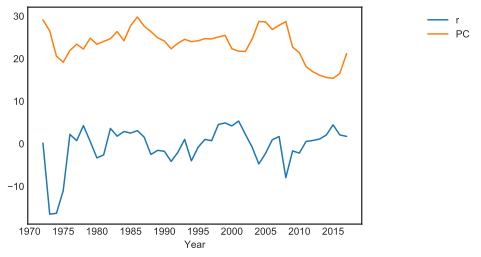

In [8]:
plt.style.use('seaborn-white')
plt.plot('Year', 'r', data= econ), plt.plot('Year', 'PC', data= econ),  
plt.axis(option = 'square')
plt.legend(bbox_to_anchor=(1, 0,0.35,1))
#plt.xlabel('GDP current US$ , Gross capita formation US$')
plt.xlabel('Year') 

*********************
# *********************

# Checking for stationarity 

In [19]:
#https://machinelearningmastery.com/time-series-data-stationary-python/
from statsmodels.tsa.stattools import adfuller

result = adfuller(econ.LRGDP)
print('Log-RGDP ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = adfuller(econ.LInf)
print('Log-inflation ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = adfuller(econ.DL)
print('Deposit Liabilities Ratio ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = adfuller(econ.PC)
print('Private credit ratio ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = adfuller(econ.K)
print('Capital (K) ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

result = adfuller(econ.FDI)
print('FDI ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = adfuller(econ.r)
print('Real interest rate ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = adfuller(econ.SEP)
print('Primary education ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = adfuller(econ.SES)
print('Secondary education ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = adfuller(econ.SET)
print('Tertiary education ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = adfuller(econ.Lfi)
print('Log of Financial instability ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = adfuller(econ.T)
print('Trade Ratio ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Log-RGDP ADF Statistic: -0.624948
p-value: 0.865245
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603
Log-inflation ADF Statistic: -4.904046
p-value: 0.000034
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612
Deposit Liabilities Ratio ADF Statistic: 0.386666
p-value: 0.980989
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
Private credit ratio ADF Statistic: -2.806884
p-value: 0.057297
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603
Capital (K) ADF Statistic: -2.345016
p-value: 0.157860
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602
FDI ADF Statistic: -2.924443
p-value: 0.042579
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603
Real interest rate ADF Statistic: -3.400311
p-value: 0.010948
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602
Primary education ADF Statistic: 0.056767
p-value: 0.962982
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602
Secondary education ADF Statistic: 1.016370
p-value: 0.994436
Critical Values:
	1%: -3.585
	5%: -2.928


'T', 'DL', 'PC', 'K', 'LRGDP', 'FDI', 'Rem', 'SEP', 'SET', 'Fi' <br>
Are all variables that require differencing to account for non-stationarity <br>

## Making it Stationary

Traditionally, time series features are selected based on their correlation with the output variable. <br>
This is called autocorrelation and involves plotting autocorrelation plots, also called a correlogram.  <br>
These show the correlation of each lagged observation and whether or not the correlation is statistically significant. <br>

In [10]:
econ.loc[:,['T', 'DL', 'PC', 'K', 'LRGDP', 'FDI', 'Rem', 'SEP', 'SET']] = econ.loc[:,['T', 'DL', 'PC', 'K', 'LRGDP', 'FDI', 'Rem', 'SEP', 'SET']].diff()
econ.head()

#econ['T'] = econ['T'] - econ['T'].shift(1) # shift(1) annual  shift(7) etc. for seasonal differencing

#differenced = differenced[1:] # trim off the first year of empty data # econ.dropna()
#differenced = differenced.astype('int')
#differenced.reset_index(drop=True, inplace=True)

,RGDP,LInf,T,DL,PC,K,LRGDP,HDI,FDI,Rem,r,SEP,SES,SET,Fi,Lfi
year,,,,,,,,,,,,,,,,
1/1/1972,2.470000e+11,0.714601,NaN,NaN,NaN,NaN,NaN,0.284690,NaN,NaN,0.153429,NaN,16.601330,NaN,4.371995,0.640680
1/1/1973,1.450000e+11,1.363049,1.073649,-4.107300,-2.5668,-1.245035,-0.230602,0.290946,-0.245859,-0.040982,-16.555917,2.316929,17.029539,0.01177,3.914025,0.592624
1/1/1974,1.610000e+11,1.425910,4.627418,-11.294838,-5.9555,0.441538,0.043672,0.297201,0.108837,-0.040982,-16.332202,2.354961,17.256830,0.00127,1.387990,0.142386
1/1/1975,1.680000e+11,1.320240,-1.211845,-2.234491,-1.4220,2.855513,0.017915,0.303457,0.174864,-0.040982,-11.041176,0.366570,18.107830,-0.04137,2.158307,0.334113
1/1/1976,1.760000e+11,0.854811,-3.150414,4.171500,2.7757,1.015807,0.021835,0.309713,-0.158828,-2.973088,2.206676,1.166039,17.961149,0.11603,0.774508,-0.110974


In [9]:
econ.rename(columns={'T':'dt', 'DL': 'ddl', 'PC': 'dpc', 'K': 'dk', 'LRGDP': 'dlrgdp',
                    'FDI': 'dfdi', 'Rem': 'drem', 'SEP': 'dsep', 'SES': 'ses', 
                    'SET': 'dset', 'Lfi': 'lfi', 'LInf': 'linf' }, 
           inplace=True)
econ.head()

,RGDP,linf,dt,ddl,dpc,dk,dlrgdp,HDI,dfdi,drem,r,dsep,ses,dset,Fi,lfi
year,,,,,,,,,,,,,,,,
1/1/1972,2.470000e+11,0.714601,NaN,NaN,NaN,NaN,NaN,0.284690,NaN,NaN,0.153429,NaN,16.601330,NaN,4.371995,0.640680
1/1/1973,1.450000e+11,1.363049,1.073649,-4.107300,-2.5668,-1.245035,-0.230602,0.290946,-0.245859,-0.040982,-16.555917,2.316929,17.029539,0.01177,3.914025,0.592624
1/1/1974,1.610000e+11,1.425910,4.627418,-11.294838,-5.9555,0.441538,0.043672,0.297201,0.108837,-0.040982,-16.332202,2.354961,17.256830,0.00127,1.387990,0.142386
1/1/1975,1.680000e+11,1.320240,-1.211845,-2.234491,-1.4220,2.855513,0.017915,0.303457,0.174864,-0.040982,-11.041176,0.366570,18.107830,-0.04137,2.158307,0.334113
1/1/1976,1.760000e+11,0.854811,-3.150414,4.171500,2.7757,1.015807,0.021835,0.309713,-0.158828,-2.973088,2.206676,1.166039,17.961149,0.11603,0.774508,-0.110974


In [14]:
econ.to_excel('Data/final.xlsx')

## Autocorrelation check

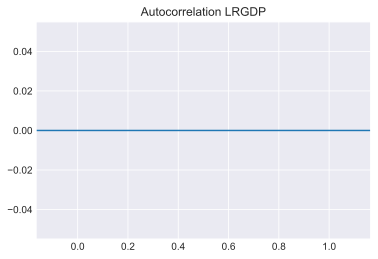

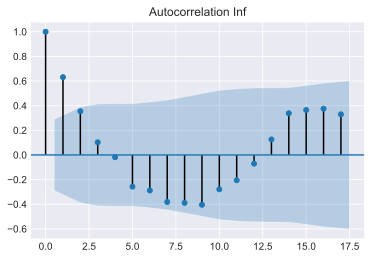

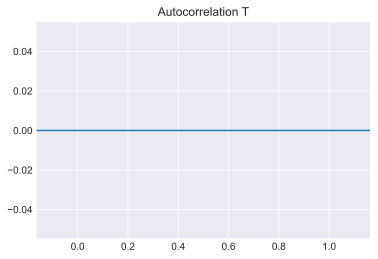

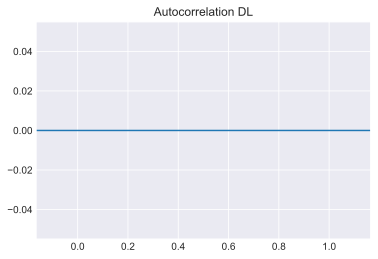

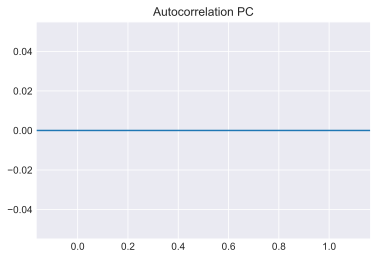

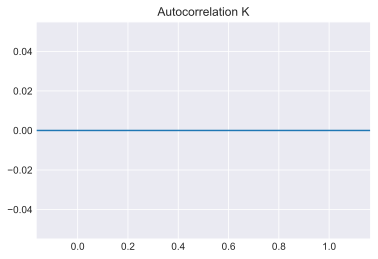

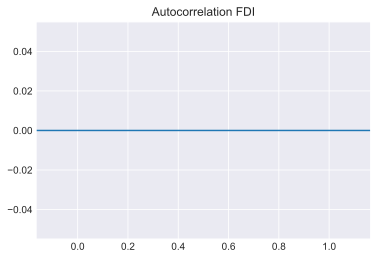

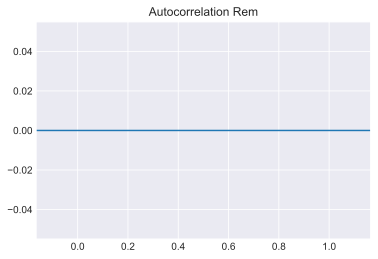

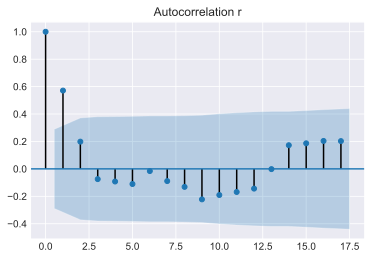

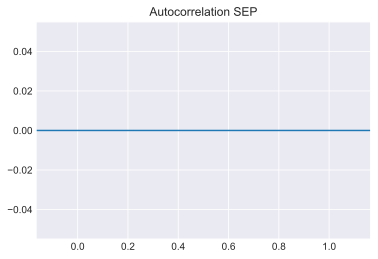

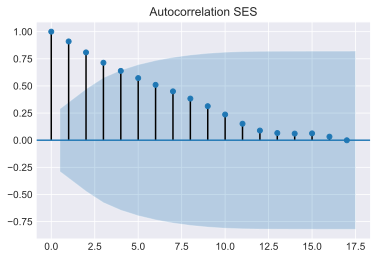

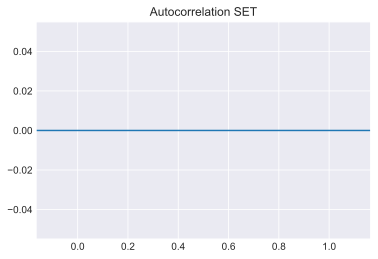

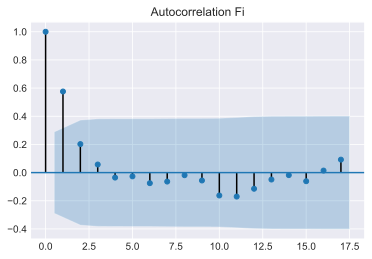

In [23]:
#Correlogram, or Autocorrelation Function (ACF) plot: showing lag values along the x-axis and correlation on the y-axis 
#between -1 and 1 for negatively and positively correlated lags
#Dots above the blue area indicate statistical significance. The correlation of 1 for the lag value of 0 indicates 100% positive correlation of an observation with itself.

from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot as plt

econ = pd.read_csv('C:/Users/Mahum/Desktop/ALL/Internship PIDE/Data/final1.csv', parse_dates=True)

plot_acf(econ['LRGDP'], title='Autocorrelation LRGDP')
plot_acf(econ['LInf'], title='Autocorrelation Inf')
plot_acf(econ['T'], title='Autocorrelation T')
plot_acf(econ['DL'], title='Autocorrelation DL')
plot_acf(econ['PC'], title='Autocorrelation PC')
plot_acf(econ['K'], title='Autocorrelation K')
plot_acf(econ['FDI'], title='Autocorrelation FDI')
plot_acf(econ['Rem'], title='Autocorrelation Rem')
plot_acf(econ['r'], title='Autocorrelation r')
plot_acf(econ['SEP'], title='Autocorrelation SEP')
plot_acf(econ['SES'], title='Autocorrelation SES')
plot_acf(econ['SET'], title='Autocorrelation SET')
plot_acf(econ['Lfi'], title='Autocorrelation Fi')

plt.show()

*********************
# *********************

# Preprocessing data to divide it in training and test set

In [17]:
econ = pd.read_excel('Data/final.xlsx')

In [18]:
from sklearn.preprocessing import StandardScaler
# Standarized X and centered Y
scaler = StandardScaler()
econ.loc[:,[ 'ddl', 'dfdi', 'dk', 'dlrgdp',
            'dpc', 'drem', 'dsep',
            'dset', 'dt', 'lfi', 'linf', 
            'lrgdp', 'r', 'ses']] = scaler.fit_transform(econ.loc[:,[ 'ddl', 'dfdi', 'dk',
                                                                     'dlrgdp', 'dpc', 'drem', 'dsep',
                                                                     'dset', 'dt', 'lfi', 'linf', 'lrgdp', 
                                                                     'r', 'ses']])

In [23]:
np.isnan(predictors).sum()

ddl     1
dfdi    1
dk      1
dpc     1
drem    1
dsep    1
dset    1
dt      1
lfi     0
linf    0
r       0
ses     0
dtype: int64

In [24]:
econ = econ.dropna()

In [25]:
target = econ.loc[:,'dlrgdp']
predictors = econ.loc[:,['ddl', 'dfdi', 'dk',  'dpc', 'drem', 'dsep',
                         'dset', 'dt', 'lfi', 'linf', 'r', 'ses']]
predictors.columns

Index(['ddl', 'dfdi', 'dk', 'dpc', 'drem', 'dsep', 'dset', 'dt', 'lfi', 'linf',
       'r', 'ses'],
      dtype='object')

In [26]:
predictors =predictors.astype('int')
target =target.astype('int')

In [11]:
target.reset_index(drop=True, inplace=True)
predictors.reset_index(drop=True, inplace=True)

In [27]:
#https://machinelearningmastery.com/a-simple-intuition-for-overfitting/ 66% 34% good fit
# https://www.researchgate.net/post/Is_there_an_ideal_ratio_between_a_training_set_and_validation_set_Which_trade-off_would_you_suggest 
    #most papers say 70% 30% split
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.30)

print (X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(31, 12) (31,) (14, 12) (14,)


In [28]:
Y_train = Y_train.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)

print (X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(31, 12) (31, 1) (14, 12) (14, 1)


*********************
# *********************

In [38]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pprint import pprint
from sklearn import preprocessing
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
import six
import pydot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
#from pandas_ml import ConfusionMatrix
from sklearn import neighbors

# Nested Cross Validation 
     - to choose the model with the lowest RMSE

In [53]:
from sklearn.model_selection import KFold
# Choose cross-validation techniques for the inner and outer loops, independently of the dataset.

# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.  `outer_cv` creates 3 folds for estimating generalization error
outer_cv = KFold(n_splits=10, shuffle=True, ) #

# when we train on a certain fold, we use a second cross-validation  split in order to choose hyperparameters
inner_cv = KFold(n_splits=10, shuffle=True,) #

# give shorthand names to models and use those as dictionary keys mapping to models and parameter grids for that model
models_and_parameters = {
    'sgd' : (linear_model.SGDRegressor(), {}),
    'knn' : (neighbors.KNeighborsRegressor(), {'n_neighbors':[5,10]}),
    'abr' : (AdaBoostRegressor(), {}),
    'svr': (SVR(), {'C': [0.01, 0.05, 0.1, 1], "gamma": [.01, .1]}),
    'rf': (RandomForestRegressor(), {'max_depth': [5, 10]}),
    'gbr' : (GradientBoostingRegressor(), {'max_depth': [ 5, 10], }),
    'dt' : (DecisionTreeRegressor(), { 'max_depth': [5, 10]}),
    'et' : ( ExtraTreesRegressor(), { 'max_depth': [5, 10]}),
}

# Collect the average of the scores on the 3 outer folds in this dictionary with keys given by the names of the models in `models_and_parameters`
average_scores_across_outer_folds_for_each_model = dict()

# find the model with the best generalization error
for name, (model, params) in models_and_parameters.items():
    # this object is a regressor that also happens to choose its hyperparameters automatically using `inner_cv`
    regressor_that_optimizes_its_hyperparams = GridSearchCV(estimator=model, param_grid=params, cv=inner_cv, scoring='neg_mean_squared_error', iid=True) 
    #scoring=scoring

    # estimate generalization error on the 3-fold splits of the data
    scores_across_outer_folds = cross_val_score(regressor_that_optimizes_its_hyperparams, X_train, Y_train, cv=outer_cv, scoring='neg_mean_squared_error')

    # get the mean MSE across each of outer_cv's 3 folds
    average_scores_across_outer_folds_for_each_model[name] = np.mean(scores_across_outer_folds)
    error_summary = 'Model: {name}\nMSE in the 3 outer folds: {scores}.\nAverage error: {avg}'
    print(error_summary.format( name=name, scores=scores_across_outer_folds, avg=np.mean(scores_across_outer_folds)))
    print()

print('Average score across the outer folds: ', average_scores_across_outer_folds_for_each_model)

many_stars = '\n' + '*' * 100 + '\n'
print(many_stars + 'Now we choose the best model and refit' + many_stars)

best_model_name, best_model_avg_score = max(average_scores_across_outer_folds_for_each_model.items(),key=(lambda name_averagescore: name_averagescore[1]))

# get the best model and its associated parameter grid
best_model, best_model_params = models_and_parameters[best_model_name]

# now  refit this best model on the whole dataset to make  predictions on other data, now we have a reliable estimate of the
#model's generalization error allowing confidence this is the best model among the ones we have tried
final_regressor = GridSearchCV(best_model, best_model_params, cv=inner_cv)
final_regressor.fit(X_train, Y_train)

print('Best model: \n\t{}'.format(best_model), end='\n\n')
print('Estimation of its generalization error (negative mean squared error):\n\t{}'.format( best_model_avg_score), end='\n\n')
print('Best parameter choice for this model: \n\t{params}'
      '\n(according to cross-validation `{cv}` on the whole dataset).'.format( params=final_regressor.best_params_, cv=inner_cv))

Model: sgd
MSE in the 3 outer folds: [-0.47961785 -0.20617149 -8.2107019  -0.82540346 -0.32133001 -0.03009683
 -0.00985572 -0.09772025 -0.79801933 -0.29243195].
Average error: -1.1271348782617563

Model: knn
MSE in the 3 outer folds: [-7.50000000e-03 -8.01000000e+00 -2.73333333e-01 -4.86666667e-01
 -4.06666667e-01 -1.66666667e-02 -6.66666667e-03 -2.76666667e-01
 -6.66666667e-03 -3.33333333e-03].
Average error: -0.9494166666666668

Model: abr
MSE in the 3 outer folds: [-1.75000000e+00 -2.05794123e-03 -2.05782313e-01 -8.52083333e+00
 -3.11556575e-02 -7.50000000e-01 -8.85416667e-02 -3.33333333e-01
 -4.02203857e-01 -1.14556213e-01].
Average error: -1.2198464314786899

Model: svr
MSE in the 3 outer folds: [-3.16461855e-01 -9.90957307e-03 -9.92194507e-03 -1.15760483e-02
 -2.78034043e-01 -8.01008749e+00 -7.97861941e-03 -1.01074987e-02
 -6.90754753e-01 -1.02250457e-02].
Average error: -0.9355056872819597

Model: rf
MSE in the 3 outer folds: [-0.0425     -0.48       -1.08       -0.03       -0.0

### This method is too unstable as most re-runs chooses a different model, also the best method to ealuate a good model is not only a small overall RMSE but also a smaller gap between train and test RMSE. So this algorithm needs to be a modified a little bit

*********************
# *********************

# Defining model functions for regressions
## Model function

In [13]:
from sklearn import model_selection, metrics
def model_func(alg, X_train, X_test, Y_train, Y_test, target, predictors, filename):
    from sklearn import metrics
    from sklearn.metrics import mean_squared_error
    #Fit the algorithm on the data
    algorithm=alg.fit(X_train, Y_train)
    print (algorithm)

    
    #RFE RFECV and other machine learning: decision trees and random forest etc dont have coefficents
    coef_dict_baseline = {}
    for coef, feat in zip(alg.coef_,predictors.columns): coef_dict_baseline[feat] = coef
    print("\nCoeffficents Dictionry")
    print( coef_dict_baseline)
    
    # predict using the whole dataset
    algorithm=alg.fit(predictors, target)
    dpredictors_predictions = alg.predict(predictors)
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)

    #Perform cross-validation:
    cv_score = model_selection.cross_val_score(alg, X_train, Y_train , cv=10, scoring='neg_mean_squared_error') 
	#scoring='accuracy', cv=kfold
    #kfold = model_selection.KFold(n_splits=10, random_state=seed) #(n=num_instances, n_folds=num_folds=n_splits=n-fold CV)
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Predict on testing data and computing error rate:
    #dtest[target] = alg.predict(dtest[predictors])
    predictions = alg.predict(X_test)
    errors = predictions !=  Y_test
    number_of_errors = errors.sum()
    error_rate = errors.sum() / len(predictions)
    
    #Print model report:
    print("\nModel Report")
    print("MSE for Entire data: %.4g" % (mean_squared_error(y_true=target , y_pred=dpredictors_predictions)))
    print("RMSE of the Entire data: %.4g" % np.sqrt(metrics.mean_squared_error(target, dpredictors_predictions)))    
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % 
          (np.mean(cv_score),  np.std(cv_score),  np.min(cv_score), np.max(cv_score)))
    print(("R-squared : %.4g" % (np.round(alg.score(X_test, Y_test)*100,2))))
    def adj_r2_score( alg, Y_test, predictions):
        adj = 1 - float(len(Y_test)-1)/(len(Y_test)-(len(alg.coef_)-1)-1)*(1 - metrics.r2_score(Y_test, predictions)) #(len(model.coef))
        return adj
    print ("Adjusted R-squared : %.4g" % (adj_r2_score(alg, Y_test, predictions)))
    print("MSE for Training data: %.4g" % (mean_squared_error(y_true=Y_train , y_pred=dtrain_predictions)))
    print ("MSE for Test data: %.4g" %(np.round(metrics.mean_squared_error(Y_test, predictions),4))) 
        #np.round(..., 2)to round off to 2 decminal points
    print("RMSE for Training data : %.4g" % np.sqrt(metrics.mean_squared_error((Y_train), dtrain_predictions)))
    print ("RMSE for Test data : %.4g" %(np.sqrt(metrics.mean_squared_error(Y_test, predictions))))
   
    # Graph on testing data: line/model
    plt.style.use('seaborn-white')
    plt.scatter(Y_test, predictions , marker='+', color='r')
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.show()
    
    #To export the output to a file
   # print(model_func, file=open("filename", "a+")) # for csv. dosent export graphs

# Model Fit Function (for algorithms without alg.coef_ option)

In [14]:
from sklearn import model_selection, metrics
def modelfunc(alg, X_train, X_test, Y_train, Y_test, target, predictors, filename):
    from sklearn import metrics
    from sklearn.metrics import mean_squared_error
    #Fit the algorithm on the data
    algorithm=alg.fit(X_train, Y_train)
    print (algorithm)

    # predict using the whole dataset
    algorithm=alg.fit(predictors, target)
    dpredictors_predictions = alg.predict(predictors)
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)

    #Perform cross-validation:
    cv_score = model_selection.cross_val_score(alg, X_train, Y_train , cv=10, scoring='neg_mean_squared_error') 
	#scoring='accuracy', cv=kfold
    #kfold = model_selection.KFold(n_splits=10, random_state=seed) #(n=num_instances, n_folds=num_folds=n_splits=n-fold CV)
    cv_score = np.sqrt(np.abs(cv_score))
    
    
    #Predict on testing data and computing error rate:
    #dtest[target] = alg.predict(dtest[predictors])
    predictions = alg.predict(X_test)
    errors = predictions !=  Y_test
    number_of_errors = errors.sum()
    error_rate = errors.sum() / len(predictions)
    
    
    #Print model report:
    print("\nModel Report")
    print("MSE for Entire data: %.4g" % (mean_squared_error(y_true=target , y_pred=dpredictors_predictions)))
    print("RMSE of the Entire data: %.4g" % np.sqrt(metrics.mean_squared_error(target, dpredictors_predictions)))    
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % 
          (np.mean(cv_score),  np.std(cv_score),  np.min(cv_score), np.max(cv_score)))
    print(("R-squared : %.4g" % (np.round(alg.score(X_test, Y_test)*100,2))))
    def adj_r2_score( alg, Y_test, predictions):
        adj = 1 - float(len(y)-1)/(len(y)-(len(model.coef)-1)-1)*(1 - metrics.r2_score(y,yhat))
        return adj
    #print ("Adjusted R-squared : %.4g" % (adj_r2_score(alg, Y_test, predictions)))
    print("MSE for Training data: %.4g" % (mean_squared_error(y_true=Y_train , y_pred=dtrain_predictions)))
    print ("MSE for Test data: %.4g" %(np.round(metrics.mean_squared_error(Y_test, predictions),4))) 
        #np.round(..., 2)to round off to 2 decminal points
    print("RMSE for Training data : %.4g" % np.sqrt(metrics.mean_squared_error((Y_train), dtrain_predictions)))
    print ("RMSE for Test data : %.4g" %(np.sqrt(metrics.mean_squared_error(Y_test, predictions))))
   
    # Graph on testing data: line/model
    plt.style.use('seaborn-white')
    plt.scatter(Y_test, predictions , marker='+', color='r')
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.show()
    
    #To export the output to a file
   # print(model_func, file=open("filename", "a+")) # for csv. dosent export graphs

*********************
# *********************

# An exmaple of OLS using the whole dataset

In [22]:
import statsmodels.api as sm
predictors = sm.add_constant(predictors)
model = sm.OLS(target, predictors).fit()  ## sm.OLS(output, input)
predictions = model.predict(predictors)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 dlrgdp   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     1.752
Date:                Thu, 19 Sep 2019   Prob (F-statistic):             0.0986
Time:                        17:54:59   Log-Likelihood:                -43.534
No. Observations:                  45   AIC:                             115.1
Df Residuals:                      31   BIC:                             140.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0071      0.134      0.053      0.958      -0.266       0.280
ddl           -0.5110      0.265     -1.928      0.063      -1.052       0.030
dfdi           0.0578      0.178      0.324      0.748      -0.306       0.422
dk             0.4553      0.209      2.184      0.037       0.030       0.881
dpc            0.2711      0.252      1.074      0.291      -0.244       0.786
drem          -0.0950      0.202     -0.471      0.641      -0.507       0.317
dsep          -0.0527      0.216     -0.243      0.809      -0.494       0.389
dset          -0.1097      0.186     -0.589      0.560      -0.490       0.270
dt             0.0820      0.205      0.399      0.693      -0.337       0.501
lfi           -0.1208      0.231     -0.523      0.604      -0.591       0.350
linf           0.3331      0.366      0.909      0.370      -0.414       1.080
lrgdp         -0.1950      0.240     -0.812      0.423      -0.684       0.294
r              0.8132      0.267      3.044      0.005       0.268       1.358
ses            0.0245      0.242      0.101      0.920      -0.469       0.519
==============================================================================
Omnibus:                       17.336   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.592
Skew:                          -0.840   Prob(JB):                     3.42e-10
Kurtosis:                       7.520   Cond. No.                         4.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*********************
# *********************

# An example using Linear Regression with whole dataset

R-squared : 41.13
MSE: 0.414
RMSE: 0.6434
{'ddl': -0.487992843502336, 'dfdi': 0.06692401989171869, 'dk': 0.44541431546037547, 'dpc': 0.21076003787940262, 'drem': -0.052968119261492794, 'dsep': -0.035836461758431526, 'dset': -0.09812609465555851, 'dt': 0.05828569414085909, 'lfi': -0.16082854113808875, 'linf': 0.2973941249024067, 'r': 0.7721283849036368, 'ses': 0.1422733652178283}


((-0.737992843502336, 1.0221283849036369), None)

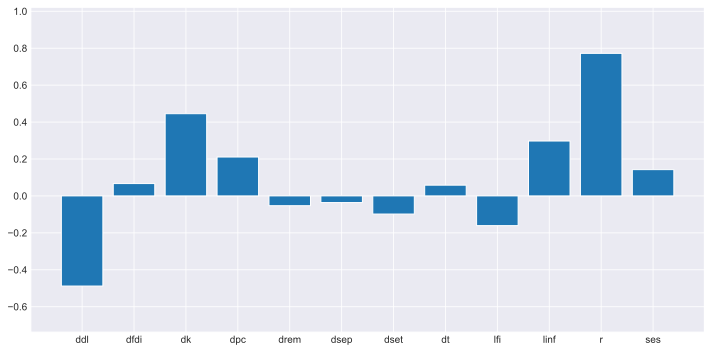

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


regression=LinearRegression()
regression.fit(predictors, target)
print(("R-squared : %.4g" % (np.round(regression.score(predictors, target)*100,2))))
print("MSE: %.4g" % (mean_squared_error(y_true=target , y_pred=regression.predict(predictors))))
print("RMSE: %.4g" % (np.sqrt(metrics.mean_squared_error(y_true=target , y_pred=regression.predict(predictors)))))


coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,predictors.columns):
    coef_dict_baseline[feat] = coef
print(coef_dict_baseline)

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')

X = np.arange(len(coef_dict_baseline)) #X = np.arange(len(regression.coef_))
plt.bar(X, coef_dict_baseline.values(), align='center', ) #coef_dict_baseline['key_name'] #plt.bar(X, regression.coef_, align='center',)
plt.xticks(X, coef_dict_baseline.keys()) #plt.xticks(X, predictors.columns)
ymax = max(coef_dict_baseline.values()) +.25  #ymax = max(regression.coef_) + .1
ymin = min(coef_dict_baseline.values()) -.25  #min(regression.coef_) -.1
plt.ylim(ymin, ymax), plt.tight_layout()

#for horizontal plot

#coef2 = pd.Series(regression.coef_, index= predictors.columns).sort_values()
#coef2.plot(kind='barh', title='Model Coefficients') #coef.plot(kind = 'barh')

# Linear Regression using training and test set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coeffficents Dictionry
{'ddl': array([-0.27047551,  0.0621104 ,  0.08002607,  0.12471415, -0.01418897,
        0.10757416, -0.15925622, -0.0453516 ,  0.0519713 , -0.18154744,
       -0.13122628, -0.17112895])}

Model Report
MSE for Entire data: 0.414
RMSE of the Entire data: 0.6434
CV Score : Mean - 0.6271 | Std - 0.2618 | Min - 0.08207 | Max - 0.8645
R-squared : 66.3
Adjusted R-squared : -1.191
MSE for Training data: 0.3485
MSE for Test data: 0.5588
RMSE for Training data : 0.5904
RMSE for Test data : 0.7476


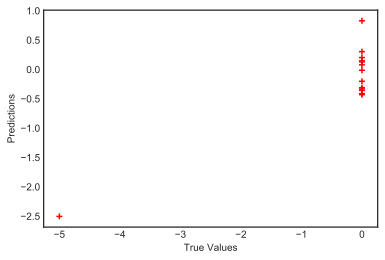

(array([-0.48799284, -0.16082854, -0.09812609, -0.05296812, -0.03583646,
         0.05828569,  0.06692402,  0.14227337,  0.21076004,  0.29739412,
         0.44541432,  0.77212838]), -0.487992843502336, array([-0.48799284]))

In [50]:
from sklearn.linear_model import LinearRegression

LR= LinearRegression()
model_func(LR, X_train, X_test, Y_train, Y_test, target, predictors, 'Regularization.csv')

LR.coef_.sort()
LR.coef_, LR.coef_[0], LR.coef_[[0]]

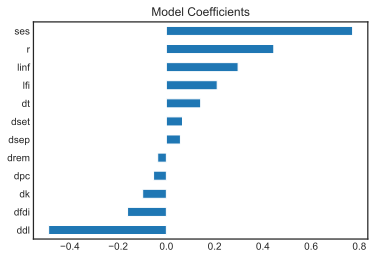

In [51]:
coef= pd.Series(LR.coef_, index = predictors.columns) 
#for some readon LR.coef_ is coming aut as 2d array: [[ ]] so we need LR.coef[0] to only look at the 'element'
#there are no other elements
coef.plot(kind='barh', title='Model Coefficients') #coef.plot(kind = 'bar'))

*********************
# *********************

# General to simple methodology to reduce regressors
    - Recursive Feature Elimination
    - Elastic Net

https://machinelearningmastery.com/feature-selection-machine-learning-python/ <br>
https://elitedatascience.com/algorithm-selection <br>

# Recursive Feature Elimination
     - Using Recursive Feature Elimination CV leads to overfitting, less features selected, higher RMSE (for the whole dataset) and bigger gap between train and test RMSE  

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

Model Report
MSE for Entire data: 0.4267
RMSE of the Entire data: 0.6533
CV Score : Mean - 0.3528 | Std - 0.2105 | Min - 0.1314 | Max - 0.7429
R-squared : 64.46
MSE for Training data: 0.3116
MSE for Test data: 0.6817
RMSE for Training data : 0.5582
RMSE for Test data : 0.8257


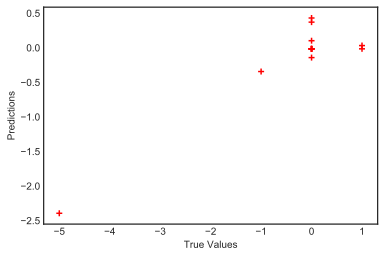

No handles with labels found to put in legend.


Num Features: 6
Selected Features: [ True False  True  True False False False False  True  True  True False]
Feature Ranking: [1 4 1 1 6 7 3 5 1 1 1 2]


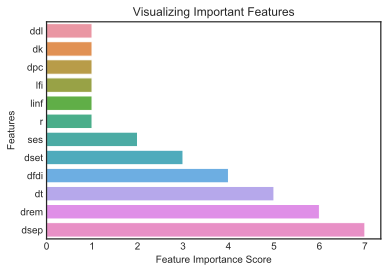

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model,  )
rfe = rfe.fit(X_train, Y_train)

modelfunc(rfe, X_train, X_test, Y_train, Y_test, target, predictors,'Regularization.csv')

# summarize the selection of the attributes
print(("Num Features: %d") % rfe.n_features_)
print(("Selected Features: %s") % rfe.support_)
print(("Feature Ranking: %s") % rfe.ranking_)

feature_imp = pd.Series(rfe.ranking_, index = predictors.columns).sort_values()
feature_imp

# Creating a bar plot (in this case the features with value 1 are the chosen/important features)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

*********************
# *********************

# Elastic Net

https://medium.com/@jayeshbahire/lasso-ridge-and-elastic-net-regularization-4807897cb722 <br>
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/ <br>
https://www.kagglhttps://erajobs.state.gov/dos-era/vacancy/viewVacancyDetail.hms?_ref=kzlkejnnpt0&returnToSearch=true&jnum=8182&orgId=44e.com/jmataya/regularization-with-lasso-and-ridge <br>
https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b <br>
https://www.kaggle.com/cast42/feature-selection-and-elastic-net <br>

In [19]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas1 = np.logspace(-5,2,8) # this gives better RMSE and MSE

Two different sets of Alphas were: used ```alphas``` was found to be superior, with simple ```model_func``` function to have a minutely lower RMSE than ```GridSeachCV```

# Elastic Net using the model_func function - 
Alphas = ```10**np.linspace(10,-2,100)*0.5```

Alpha= 0.026683496156031508
L1  = 0.5
ElasticNet(alpha=0.026683496156031508, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

Model Report
MSE for Entire data: 0.4272
RMSE of the Entire data: 0.6536
CV Score : Mean - 0.2888 | Std - 0.2433 | Min - 0.07888 | Max - 0.7624
R-squared : 58.47
MSE for Training data: 0.2603
MSE for Test data: 0.7967
RMSE for Training data : 0.5102
RMSE for Test data : 0.8926


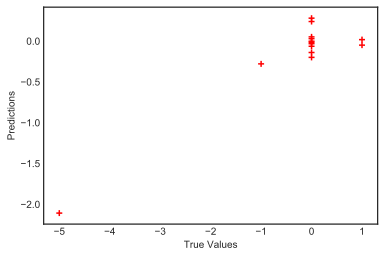

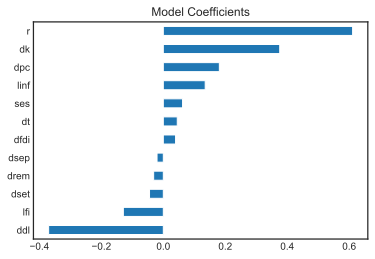

In [21]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn import metrics

lm_elastic = ElasticNetCV(alphas= alphas,)# l1_ratio=[.2,.4,.6,.8]) # l1_ratio=[.1, .2, .4, .5, .6, .7, .8, .9, .95, .99])

lm_elastic.fit(X_train, Y_train)
print("Alpha=", lm_elastic.alpha_)
print ("L1  =", lm_elastic.l1_ratio )

lm_alpha=  ElasticNet(alpha=lm_elastic.alpha_, normalize=False)
modelfunc(lm_alpha, X_train, X_test, Y_train, Y_test, target, predictors,'Regularization.csv')

coef2 = pd.Series(lm_alpha.coef_, index= predictors.columns).sort_values()
coef2.plot(kind='barh', title='Model Coefficients') #coef.plot(kind = 'barh')

# Elastic Net using the GridSearchCV to optimize parameters
``` {'alpha':10**np.linspace(10,-2,100)*0.5  ``` 
<br>
    ```'l1_ratio':[.2,.4,.6,.8]} ``` 

In [24]:
#https://educationalresearchtechniques.com/2018/12/24/elastic-net-regression-in-python/
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':10**np.linspace(10,-2,100)*0.5,'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',
                    n_jobs=1,
                    refit=True,
                    cv=10, 
                    iid=True)

search.fit(X_train,Y_train)
print(search.best_params_) #Out[]: {'alpha':  'l1_ratio': }
print("Score %.4g" % (abs(search.best_score_))) #Out[74]: 1.0816514028705004 

{'alpha': 0.0466301673441609, 'l1_ratio': 0.4}
Score 0.1281


ElasticNet(alpha=0.0466301673441609, copy_X=True, fit_intercept=True,
           l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

Model Report
MSE for Entire data: 0.4424
RMSE of the Entire data: 0.6652
CV Score : Mean - 0.2657 | Std - 0.254 | Min - 0.05819 | Max - 0.7702
R-squared : 54.48
MSE for Training data: 0.2478
MSE for Test data: 0.8733
RMSE for Training data : 0.4978
RMSE for Test data : 0.9345


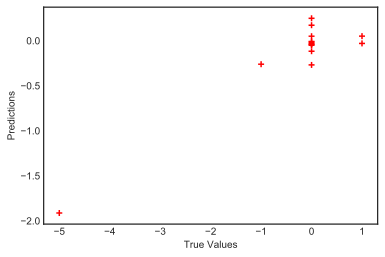

Coefficient Dictionary Baseline :[('ddl', -0.3062317462238114), ('dfdi', 0.029426444598356624), ('dk', 0.3363777229061643), ('dpc', 0.16414246222775475), ('drem', -0.02321494998515684), ('dsep', -0.009348959447045198), ('dset', -0.025548163534454844), ('dt', 0.043317218898141586), ('lfi', -0.11649532623463901), ('linf', 0.0684538381300528), ('r', 0.5322948694761277), ('ses', 0.032461887844537615)]


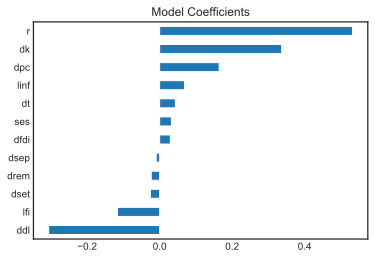

In [25]:
elastic=ElasticNet(normalize=False,alpha = 0.0466301673441609,l1_ratio=0.4)
modelfunc(elastic, X_train, X_test, Y_train, Y_test, target, predictors,'Regularization.csv')

coef_dict_baseline1 = {}
for coef, feat in zip(elastic.coef_,predictors.columns):
    coef_dict_baseline1[feat] = coef
print("Coefficient Dictionary Baseline :%s" % sorted(coef_dict_baseline1.items()))

coef2 = pd.Series(elastic.coef_, index= predictors.columns).sort_values()
coef2.plot(kind='barh', title='Model Coefficients') #coef.plot(kind = 'barh')

# Graphs regarding Elastic Net coefficents and RMSE

In [63]:
coefs = []
for a in alphas1:
    elastic = ElasticNet(alpha=a, normalize=False)
    elastic.fit(X_train, Y_train)
    coefs.append(elastic.coef_)

RMSE_list = []
for a in alphas1:
    elastic = ElasticNet(alpha=a, normalize=False)
    elastic.fit(X_train, Y_train)
    predictions = elastic.predict(X_test)
    RMSE =np.sqrt(metrics.mean_squared_error((Y_test), predictions)) # dont necessarily need (Y_train).values
    RMSE_list.append(RMSE)


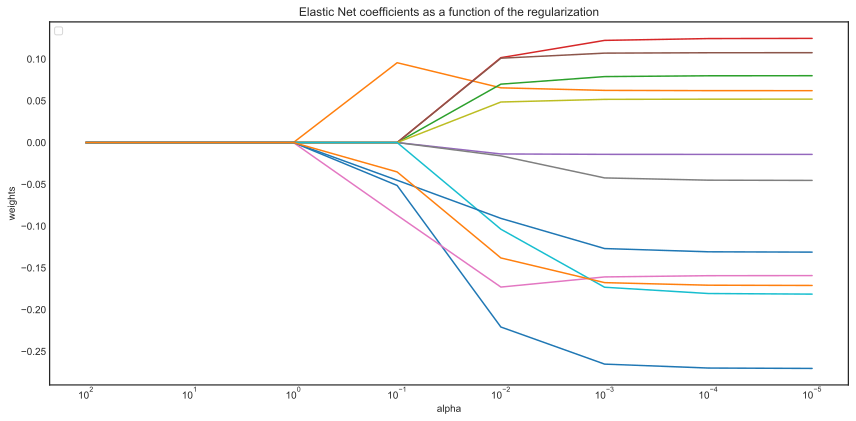

((223.872113856834,
  4.466835921509635e-06,
  -0.29017964306363125,
  0.14444513547969653),
 None,
 None)

In [64]:
# Display results
fig = plt.figure(figsize=(12, 6))

ax = plt.gca()
ax.plot(alphas1, coefs), ax.set_xscale('log'), ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha'), plt.ylabel('weights'), plt.title('Elastic Net coefficients as a function of the regularization')
ax.legend(loc='upper left', frameon=True)
plt.axis('tight'), fig.tight_layout(), plt.show()

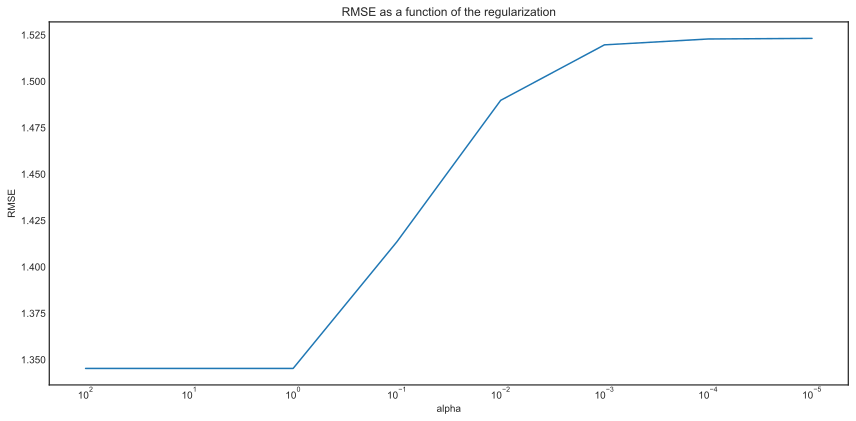

((223.872113856834,
  4.466835921509635e-06,
  1.3363930393102752,
  1.5320538843654572),
 None,
 None)

In [65]:
fig = plt.figure(figsize=(12, 6))

ax = plt.gca()    
ax.plot(alphas1, RMSE_list), ax.set_xscale('log'), ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha'), plt.ylabel('RMSE'), plt.title('RMSE as a function of the regularization')
plt.axis('tight'), fig.tight_layout(), plt.show()

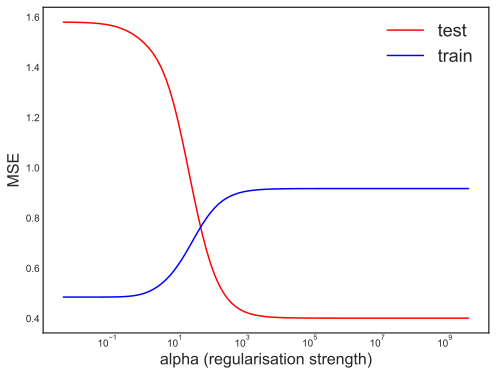

In [40]:
## RMSE as a function of the regularization - Train and Test data
RMSE_test_list = []
RMSE_train_list = []
for a in alphas:
    ridge = Ridge(alpha=a, normalize=False)
    ridge.fit(X_train, Y_train)
    predictions_test = ridge.predict(X_test)
    predictions_train = ridge.predict(X_train)
    RMSE_test =np.sqrt(metrics.mean_squared_error((Y_test), predictions_test))
    RMSE_train =np.sqrt(metrics.mean_squared_error((Y_train), predictions_train))
    
    RMSE_test_list.append(RMSE_test) 
    RMSE_train_list.append(RMSE_train) 

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xscale('log')
ax.plot(alphas, RMSE_test_list, 'r', label='test')
ax.plot(alphas, RMSE_train_list, 'b', label='train')
ax.set_ylabel('MSE', fontsize=16)
ax.set_xlabel('alpha (regularisation strength)', fontsize=16)
ax.legend(fontsize=18)
plt.savefig('bias_variance_tradeoff.png')

*********************
# *********************

# Machine learning algorithms
    - Support Vector Machine (Regression)
    - Extra Trees
    - Decision Trees
    - Random Forests
    - Gradient Boosting Regression
    - AdaBoost Regression
    - Neural Networks

In [39]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pprint import pprint
from sklearn import preprocessing
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
import six
import pydot

In [40]:
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
#from pandas_ml import ConfusionMatrix
from sklearn import neighbors

# Support Vector Machine

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Model Report
MSE for Entire data: 0.54
RMSE of the Entire data: 0.7348
CV Score : Mean - 0.2433 | Std - 0.2903 | Min - 0.04382 | Max - 0.8167
R-squared : 16.15
MSE for Training data: 0.05737
MSE for Test data: 1.609
RMSE for Training data : 0.2395
RMSE for Test data : 1.268


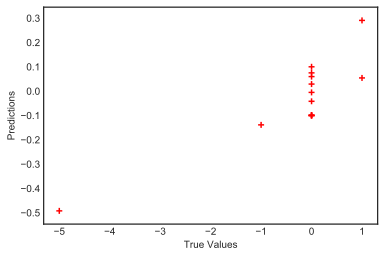

In [41]:
svr = SVR()
Tree = modelfunc(svr, X_train, X_test, Y_train, Y_test,  target, predictors,'Regularization.csv')

*********************
# *********************

# Extra Tree Regressor

In [36]:
depth = []
for i in range(3,20):
    etr = ExtraTreesRegressor(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=etr, X=X_train, y=Y_train, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
    depth.append((i, -scores.mean()))
print(depth)

pd_scores = pd.Series(depth)
df_scores = pd.DataFrame({'depth': pd_scores.str[0], 'score': pd_scores.str[1]})
df_scores.sort_values(by='score', ascending=True)

[(3, 0.14162765575359898), (4, 0.14382800631498932), (5, 0.16006626782863048), (6, 0.15694317460317458), (7, 0.1428095238095238), (8, 0.1700952380952381), (9, 0.1649047619047619), (10, 0.15576190476190477), (11, 0.16014285714285714), (12, 0.18823809523809523), (13, 0.15976190476190477), (14, 0.15914285714285714), (15, 0.14309523809523808), (16, 0.17547619047619045), (17, 0.16614285714285715), (18, 0.1747142857142857), (19, 0.15976190476190477)]


,depth,score
0,3,0.141628
4,7,0.142810
12,15,0.143095
1,4,0.143828
7,10,0.155762
3,6,0.156943
11,14,0.159143
10,13,0.159762
16,19,0.159762
2,5,0.160066


Feature Importance
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=5,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

Model Report
MSE for Entire data: 0.03859
RMSE of the Entire data: 0.1964
CV Score : Mean - 0.5499 | Std - 0.1609 | Min - 0.2687 | Max - 0.7881
R-squared : 99.92
MSE for Training data: 0.0554
MSE for Test data: 0.0014
RMSE for Training data : 0.2354
RMSE for Test data : 0.03691


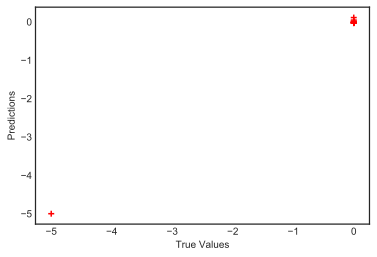

dk      0.352146
r       0.223677
lfi     0.141833
ses     0.124762
dt      0.045306
dpc     0.036153
dfdi    0.023852
ddl     0.021032
dset    0.009605
dsep    0.008545
drem    0.008224
linf    0.004865
dtype: float64


(Text(0.5, 0, 'Feature Importance Score'),
 Text(0, 0.5, 'Features'),
 Text(0.5, 1.0, 'Visualizing Important Features'),
 <matplotlib.legend.Legend at 0x1d50b81a438>)

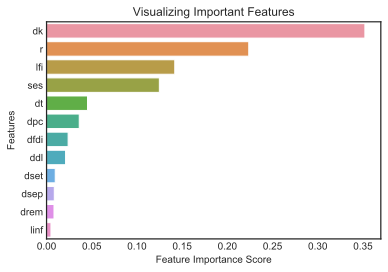

In [90]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
# fit an Extra Trees model to the data
etr = ExtraTreesRegressor(max_depth=5)
etr.fit(X_train, Y_train)
# display the relative importance of each attribute
print(("Feature Importance")% etr.feature_importances_)

modelfunc(etr,  X_train, X_test, Y_train, Y_test,target, predictors,'Regularization.csv')


feature_imp = pd.Series(etr.feature_importances_,index=predictors.columns).sort_values(ascending=False)
print(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score') ,plt.ylabel('Features') ,plt.title("Visualizing Important Features"), plt.legend()

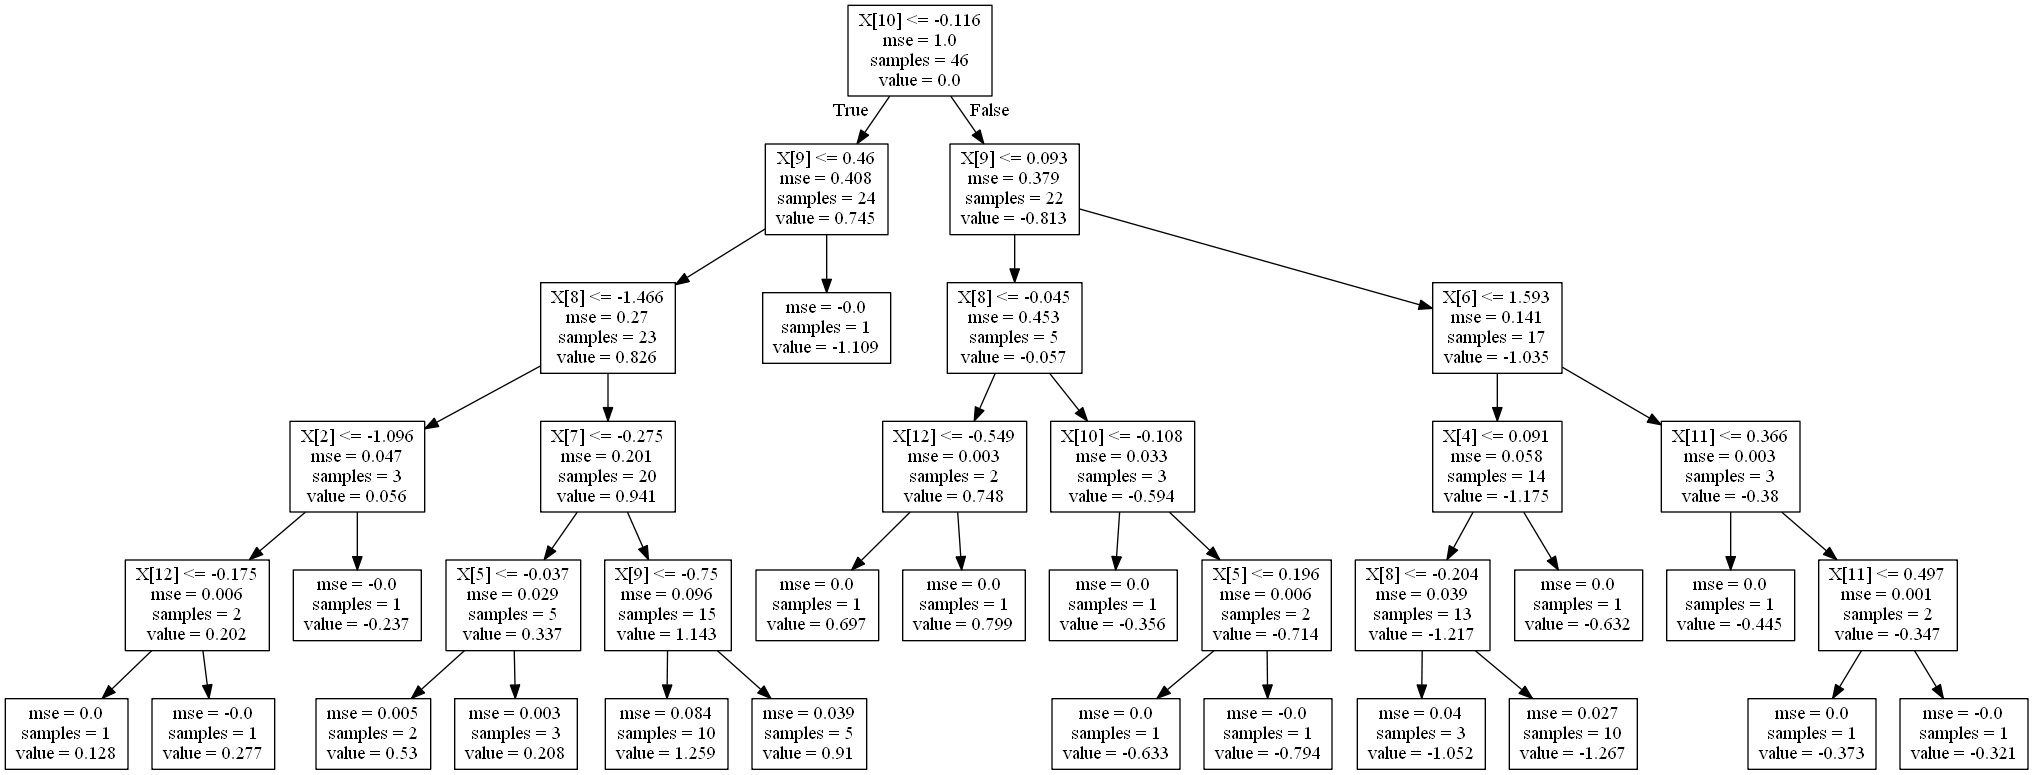

In [57]:
# Generating an image of an tree from the extra tree classifier
dot_data = StringIO()
tree.export_graphviz(etr.estimators_[0], out_file='tree_from_forest.dot')
(graph,) = pydot.graph_from_dot_file('tree_from_forest.dot')
graph.write_png('tree_from_forest.png')
from PIL import Image
try:  
    img  = Image.open('tree_from_forest.png')  
except IOError: 
    pass
img

*********************
# *********************

# Decision Tree Regression

In [33]:
# x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.4,random_state=0)
depth = []
for i in range(3,20):
    dtr = tree.DecisionTreeRegressor(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=dtr, X=predictors, y=target, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
    depth.append((i, -scores.mean()))
print(depth)

pd_scores = pd.Series(depth)
df_scores = pd.DataFrame({'depth': pd_scores.str[0], 'score': pd_scores.str[1]})
df_scores.sort_values(by='score', ascending=True)

[(3, 0.7482490695072788), (4, 0.7582823312908169), (5, 0.7504041320231797), (6, 0.7777777777777779), (7, 0.8444444444444443), (8, 0.8444444444444443), (9, 0.7777777777777779), (10, 0.7555555555555556), (11, 0.8), (12, 0.7555555555555556), (13, 0.7777777777777779), (14, 0.7555555555555556), (15, 0.8), (16, 0.8222222222222222), (17, 0.8222222222222222), (18, 0.8), (19, 0.8222222222222222)]


,depth,score
0,3,0.748249
2,5,0.750404
11,14,0.755556
7,10,0.755556
9,12,0.755556
1,4,0.758282
3,6,0.777778
6,9,0.777778
10,13,0.777778
12,15,0.800000


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Model Report
MSE for Entire data: 0.03812
RMSE of the Entire data: 0.1953
CV Score : Mean - 0.3865 | Std - 0.3301 | Min - 0 | Max - 0.8165
R-squared : 96.27
MSE for Training data: 0.02298
MSE for Test data: 0.0716
RMSE for Training data : 0.1516
RMSE for Test data : 0.2677


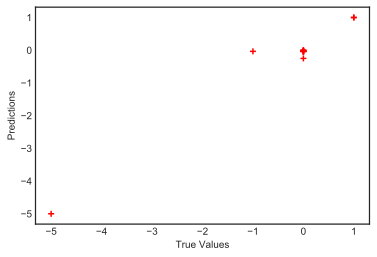

No handles with labels found to put in legend.


Feature Importance
linf    0.601425
r       0.255420
dfdi    0.034208
dset    0.026730
dpc     0.022408
dt      0.022275
dsep    0.017820
ses     0.014259
drem    0.005455
lfi     0.000000
dk      0.000000
ddl     0.000000
dtype: float64


(Text(0.5, 0, 'Feature Importance Score'),
 Text(0, 0.5, 'Features'),
 Text(0.5, 1.0, 'Visualizing Important Features'),
 <matplotlib.legend.Legend at 0x1ef85bb50f0>)

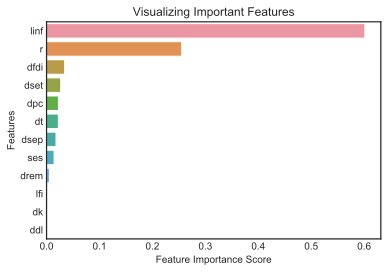

In [34]:
DTR = DecisionTreeRegressor(max_depth=5)

Tree = modelfunc(DTR, X_train, X_test, Y_train, Y_test,  target, predictors,'Regularization.csv')
print('Feature Importance' %(DTR.feature_importances_))

feature_imp = pd.Series(DTR.feature_importances_,index=predictors.columns).sort_values(ascending=False)
print(feature_imp)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score') ,plt.ylabel('Features') ,plt.title("Visualizing Important Features"), plt.legend()

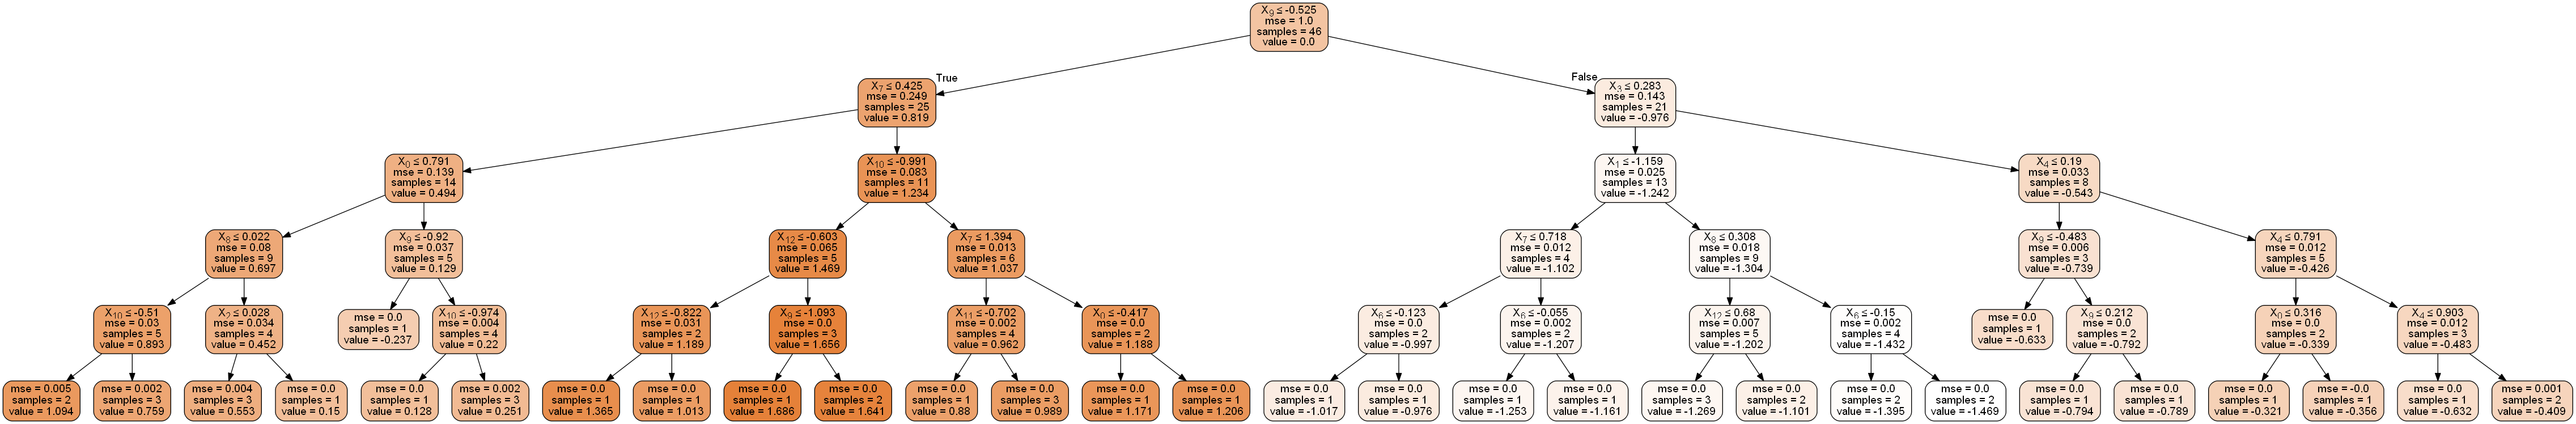

In [50]:
# Generating an image of Decision Tree
dot_data = StringIO()
export_graphviz(DTR, out_file=dot_data,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())         

*********************
# *********************

## Random Forest

In [35]:
depth = []
for i in range(3,20):
    rfr = RandomForestRegressor(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=rfr, X=X_train, y=Y_train, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
    depth.append((i, -scores.mean()))
print(depth)

pd_scores = pd.Series(depth)
df_scores = pd.DataFrame({'depth': pd_scores.str[0], 'score': pd_scores.str[1]})
df_scores.sort_values(by='score', ascending=True)

[(3, 0.15792777289386967), (4, 0.16099338624338627), (5, 0.1454285714285714), (6, 0.1767142857142857), (7, 0.17523809523809525), (8, 0.15614285714285717), (9, 0.154), (10, 0.16942857142857143), (11, 0.1373809523809524), (12, 0.16247619047619047), (13, 0.13738095238095238), (14, 0.15214285714285714), (15, 0.16828571428571432), (16, 0.15495238095238092), (17, 0.1720952380952381), (18, 0.1620952380952381), (19, 0.17490476190476192)]


,depth,score
10,13,0.137381
8,11,0.137381
2,5,0.145429
11,14,0.152143
6,9,0.154000
13,16,0.154952
5,8,0.156143
0,3,0.157928
1,4,0.160993
15,18,0.162095


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Model Report
MSE for Entire data: 0.2513
RMSE of the Entire data: 0.5013
CV Score : Mean - 0.5725 | Std - 0.1233 | Min - 0.3626 | Max - 0.8026
R-squared : 67.87
MSE for Training data: 0.1242
MSE for Test data: 0.5328
RMSE for Training data : 0.3524
RMSE for Test data : 0.73


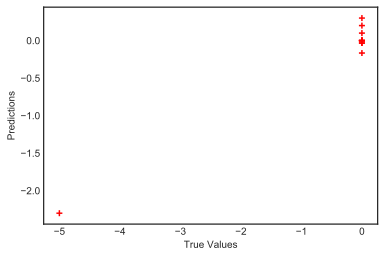

[0.06248247 0.12304304 0.03575541 0.15241228 0.06083078 0.04450817
 0.0125     0.08361599 0.02870645 0.00096649 0.30278434 0.09239459]
r       0.302784
dpc     0.152412
dfdi    0.123043
ses     0.092395
dt      0.083616
ddl     0.062482
drem    0.060831
dsep    0.044508
dk      0.035755
lfi     0.028706
dset    0.012500
linf    0.000966
dtype: float64


(Text(0.5, 0, 'Feature Importance Score'),
 Text(0, 0.5, 'Features'),
 Text(0.5, 1.0, 'Visualizing Important Features'),
 <matplotlib.legend.Legend at 0x1d50933b630>)

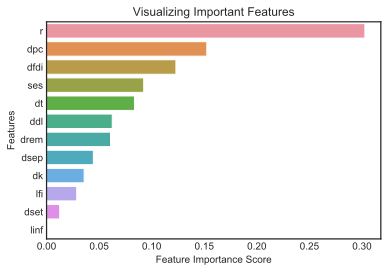

In [88]:
RFR = RandomForestRegressor(max_depth=5, n_estimators=10)

RF=modelfunc(RFR, X_train, X_test, Y_train, Y_test , target, predictors, 'Regularization.csv')
print(RFR.feature_importances_)

feature_imp = pd.Series(RFR.feature_importances_,index=predictors.columns).sort_values(ascending=False)
print(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score') ,plt.ylabel('Features') ,plt.title("Visualizing Important Features"), plt.legend()

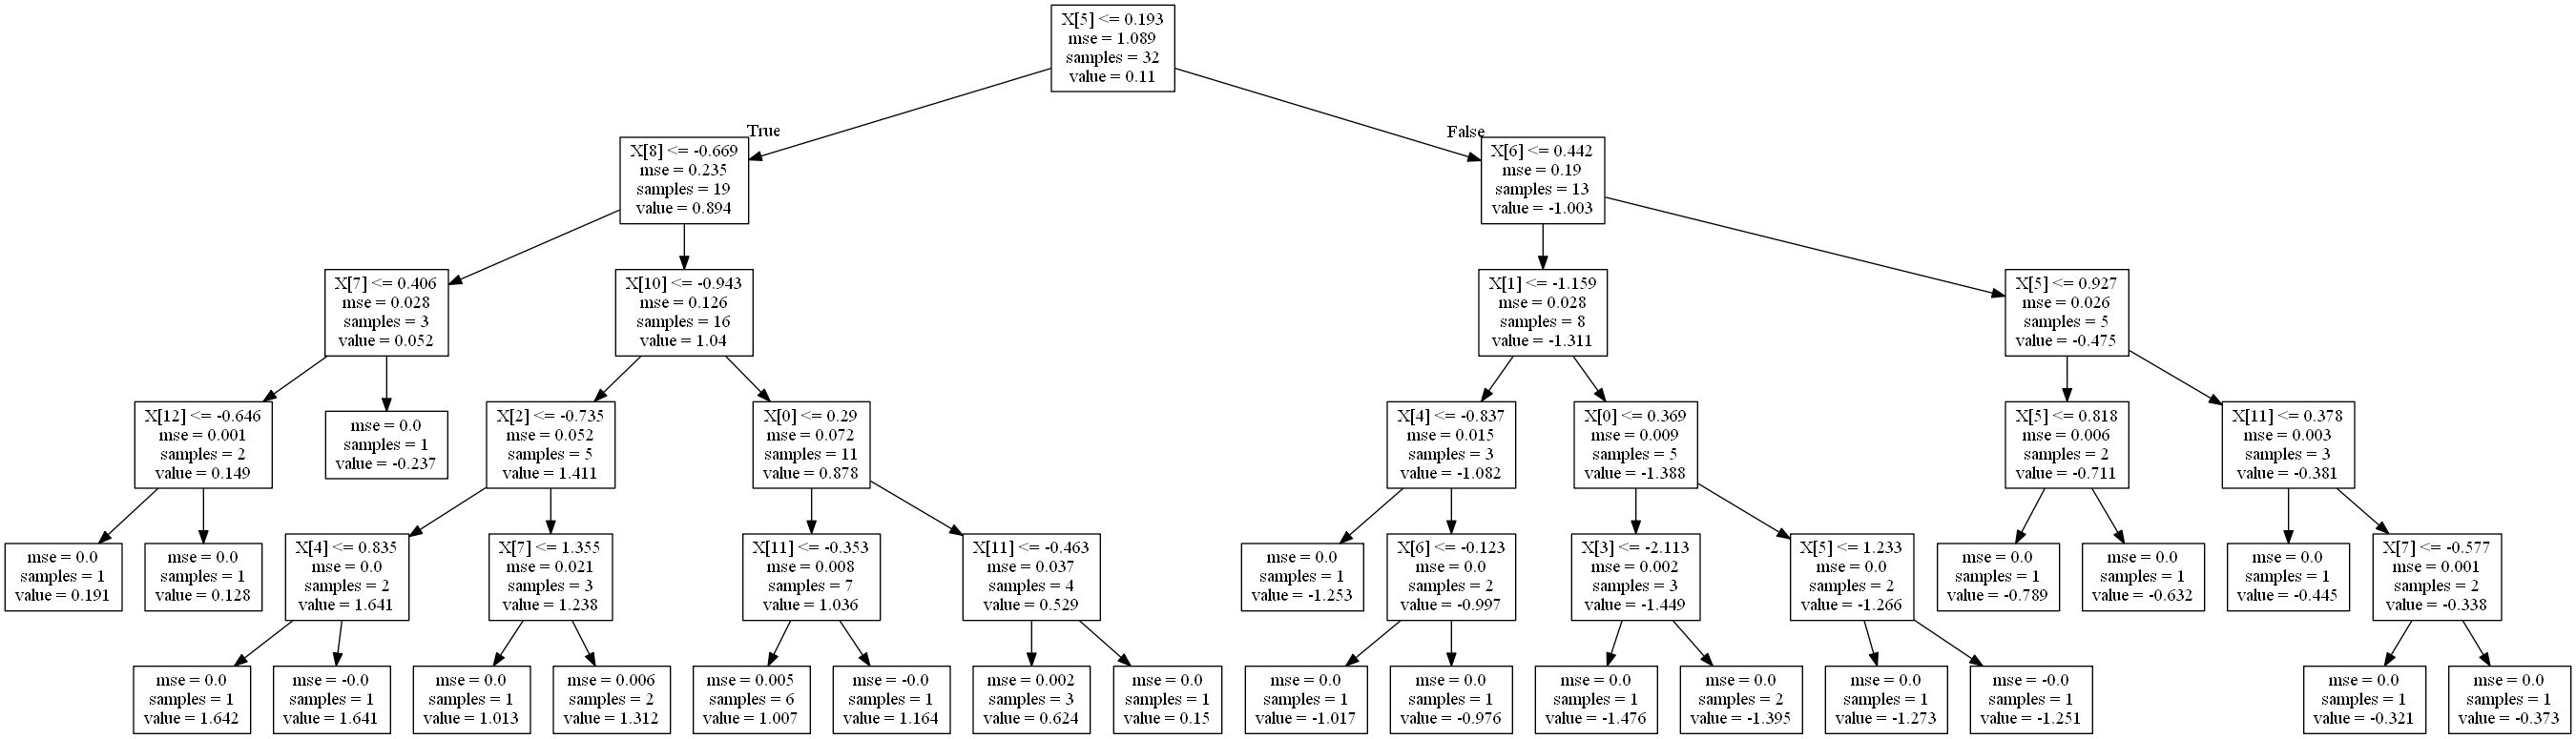

In [53]:
# Generating an image of an tree from the random forest
dot_data = StringIO()
tree.export_graphviz(RFR.estimators_[0], out_file='tree_from_forest.dot')
(graph,) = pydot.graph_from_dot_file('tree_from_forest.dot')
graph.write_png('tree_from_forest.png')
from PIL import Image
try:  
    img  = Image.open('tree_from_forest.png')  
except IOError: 
    pass
img

*********************
# *********************

# Gradient Boosted Trees

In [37]:
depth = []
for i in range(3,20):
    gbr = GradientBoostingRegressor(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=gbr, X=X_train, y=Y_train, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
    depth.append((i, -scores.mean()))
print(depth)

pd_scores = pd.Series(depth)
df_scores = pd.DataFrame({'depth': pd_scores.str[0], 'score': pd_scores.str[1]})
df_scores.sort_values(by='score', ascending=True)

[(3, 0.15883578757051736), (4, 0.17031695944006375), (5, 0.18015609533706325), (6, 0.18323308139508904), (7, 0.1959734229298237), (8, 0.17773934703850497), (9, 0.18065671424186497), (10, 0.17152057824706407), (11, 0.16336021712205961), (12, 0.17179803359865656), (13, 0.17941917184813244), (14, 0.1802042632669952), (15, 0.1729854022907596), (16, 0.17398680998185562), (17, 0.1860698574000553), (18, 0.1817522202007104), (19, 0.1958320012616647)]


,depth,score
0,3,0.158836
8,11,0.163360
1,4,0.170317
7,10,0.171521
9,12,0.171798
12,15,0.172985
13,16,0.173987
5,8,0.177739
10,13,0.179419
2,5,0.180156


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Model Report
MSE for Entire data: 1.39e-06
RMSE of the Entire data: 0.001179
CV Score : Mean - 0.3235 | Std - 0.2922 | Min - 6.868e-06 | Max - 0.8165
R-squared : 100
MSE for Training data: 9.513e-07
MSE for Test data: 0
RMSE for Training data : 0.0009754
RMSE for Test data : 0.001537


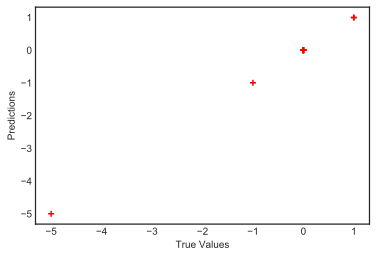

No handles with labels found to put in legend.


lfi     0.308348
r       0.241412
ddl     0.162630
linf    0.079982
dt      0.067825
dfdi    0.038541
dpc     0.029676
drem    0.018569
dk      0.017287
dset    0.013478
ses     0.011768
dsep    0.010486
dtype: float64


(Text(0.5, 0, 'Feature Importance Score'),
 Text(0, 0.5, 'Features'),
 Text(0.5, 1.0, 'Visualizing Important Features'),
 <matplotlib.legend.Legend at 0x1ef85c59f28>)

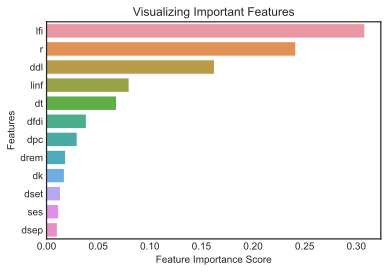

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

gbr= GradientBoostingRegressor(max_depth=5)
gbr.fit(X_train, Y_train)

modelfunc(gbr,  X_train, X_test, Y_train, Y_test,target, predictors,'Regularization.csv')

feature_imp = pd.Series(gbr.feature_importances_,index=predictors.columns).sort_values(ascending=False)
print(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score') ,plt.ylabel('Features') ,plt.title("Visualizing Important Features"), plt.legend()

*********************
# *********************

# AdaBoost Regressor

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

Model Report
MSE for Entire data: 0.05127
RMSE of the Entire data: 0.2264
CV Score : Mean - 0.2659 | Std - 0.3145 | Min - 0 | Max - 0.8165
R-squared : 96.71
MSE for Training data: 0.0459
MSE for Test data: 0.0632
RMSE for Training data : 0.2142
RMSE for Test data : 0.2513


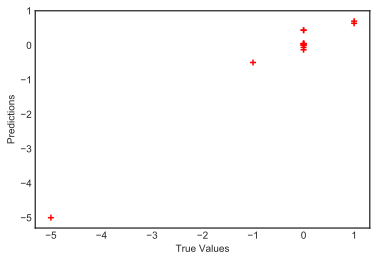

lfi     0.251571
r       0.185429
dk      0.141495
ses     0.140120
dpc     0.066169
linf    0.047073
ddl     0.039519
dt      0.039279
drem    0.038635
dfdi    0.029819
dset    0.018707
dsep    0.002184
dtype: float64


No handles with labels found to put in legend.


(Text(0.5, 0, 'Feature Importance Score'),
 Text(0, 0.5, 'Features'),
 Text(0.5, 1.0, 'Visualizing Important Features'),
 <matplotlib.legend.Legend at 0x1ef84c41cc0>)

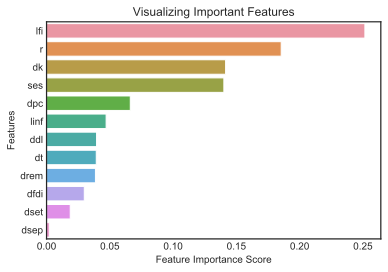

In [42]:
abr = AdaBoostRegressor()

Tree = modelfunc(abr, X_train, X_test, Y_train, Y_test,  target, predictors,'Regularization.csv')

feature_imp = pd.Series(abr.feature_importances_,index=predictors.columns).sort_values(ascending=False)
print(feature_imp)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score') ,plt.ylabel('Features') ,plt.title("Visualizing Important Features"), plt.legend()

*********************
# *********************

# Neural Networks

*********************
# *********************

# Predictions

https://www.youtube.com/watch?v=QLVMqwpOLPk&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=5&ab_channel=sentdex <br>
https://pythonprogramming.net/forecasting-predicting-machine-learning-tutorial/ <br>
https://stackoverflow.com/questions/38545640/numpy-int64-object-has-no-attribute-timestamp <br>
https://stackoverflow.com/questions/48884782/how-to-forecast-future-dataframe-using-sklearn-python <br>
https://github.com/joaoavf/misc/blob/master/stackoverflow/forecast.ipynb <br>

In [36]:
pd.set_option('display.max_columns', None) 
econ = pd.read_excel('Data/final.xlsx', sheet_name="Sheet1", parse_dates=True)
econ = econ.dropna()

predictors = econ.loc[:,['ddl',	'dfdi',	'dk',	'dpc', 'drem',	'dsep', 'dset',	'dt',	'lfi',	'linf', 'r',	'ses']]
target = np.array(econ['dlrgdp']) #econ.loc[:,['dlrgdp']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.30)
print (X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(31, 12) (31,) (14, 12) (14,)


[-0.12330918 -0.09872179 -0.02297148  0.0217678   0.02225098 -0.01808632
  0.0066675  -0.02308453 -0.00974285 -0.00040044 -0.01656752 -0.02146042
  0.02043064  0.00627533 -0.02991778 -0.03900833 -0.01397309 -0.02165243
 -0.03384946  0.01326124  0.01270568 -0.04377336 -0.00670286  0.01453275
 -0.02330169  0.00676534 -0.01897345 -0.01124648 -0.00457336 -0.02431065
 -0.01932317 -0.00880312  0.02265643 -0.00041305 -0.007535   -0.0149969
 -0.09597777 -0.04854199 -0.03040189  0.00711365  0.00975599  0.00282485
  0.02259675  0.0019292   0.0542041 ]


(Text(0.5, 0, 'Year'), Text(0, 0.5, 'LRGDP'))

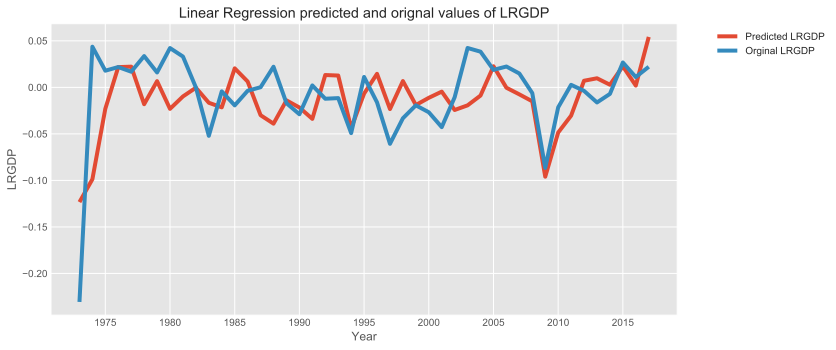

In [39]:
clf = LinearRegression()
clf.fit(X_train, Y_train) #adr
forecast_set = clf.predict(predictors) # can be one value or an array of values
print(forecast_set)

plt.figure(figsize=(10,5))
line_up, = plt.plot(econ['dateid01'], forecast_set, label='Predicted LRGDP')
line_down, = plt.plot(econ['dateid01'], econ['dlrgdp'], label='Orginal LRGDP')
plt.legend(handles=[line_up, line_down]), plt.legend(bbox_to_anchor=(1, 0,0.25,1))
plt.title('Linear Regression predicted and orignal values of LRGDP')
plt.xlabel('Year'), plt.ylabel('LRGDP')

[-0.13064185 -0.07630883 -0.07651985 -0.07619641 -0.07606602 -0.07623307
 -0.0760174  -0.05803573 -0.07505502 -0.07622766 -0.07539414 -0.07620616
 -0.07546089 -0.07504497 -0.07587738 -0.07521349 -0.0748858  -0.07385168
 -0.07621439 -0.0756247  -0.07223528 -0.07600581 -0.07593363 -0.07303696
 -0.07557342 -0.076226   -0.07623151 -0.07623391 -0.07618876 -0.07605435
 -0.05786842 -0.06109858 -0.07607751 -0.07623388 -0.07623381 -0.07623391
 -0.07623391 -0.0762339  -0.0762339  -0.07622546 -0.0761958  -0.07615073
 -0.07330778 -0.07620625 -0.07619147]


(Text(0.5, 0, 'Year'), Text(0, 0.5, 'LRGDP'))

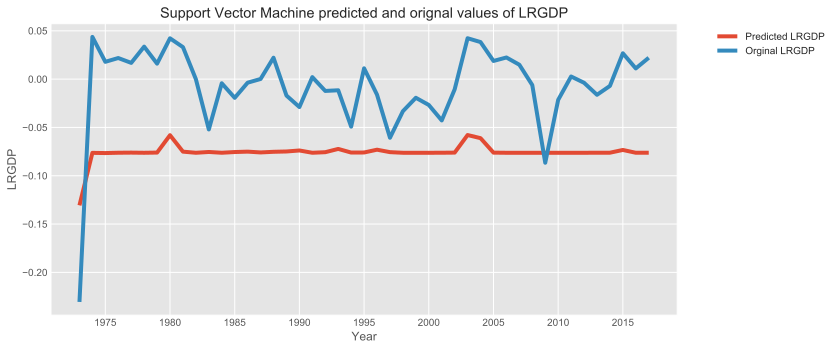

In [40]:
svr = SVR()#clf = LinearRegression(n_jobs=-1) #adr = AdaBoostRegressor()
svr.fit(X_train, Y_train) #adr
forecast_set0 = svr.predict(predictors) # can be one value or an array of values
print(forecast_set0)

plt.figure(figsize=(10,5))
line_up, = plt.plot(econ['dateid01'], forecast_set0, label='Predicted LRGDP')
line_down, = plt.plot(econ['dateid01'], econ['dlrgdp'], label='Orginal LRGDP')
plt.legend(handles=[line_up, line_down])
plt.legend(bbox_to_anchor=(1, 0,0.25,1))
plt.title('Support Vector Machine predicted and orignal values of LRGDP')
plt.xlabel('Year'), plt.ylabel('LRGDP')

[-2.30149718e-01 -1.63749332e-01  1.77960851e-02  2.14745268e-02
  1.65385273e-02 -3.65699303e-05  7.05321182e-03  4.17751858e-02
  2.27756364e-02 -6.03950486e-05  2.49747006e-03  1.41873036e-02
 -1.89914914e-02 -3.61221015e-03 -8.26192852e-03  2.18549491e-02
 -1.66341207e-02 -2.82443291e-02 -3.13918728e-02  3.64922738e-03
 -1.14200826e-02 -4.90974851e-02  1.06493803e-02 -1.57311117e-02
 -1.83396215e-02 -3.27481328e-02 -1.95816529e-02 -2.67375169e-02
 -4.24992985e-02  9.81382700e-03  4.19680814e-02  3.82398474e-02
  1.87920986e-02 -2.85807529e-03  1.46686053e-02 -4.60066308e-02
 -8.60965397e-02 -2.14654300e-02  2.40104547e-03 -3.86865653e-03
 -1.59285017e-02 -1.88238380e-02  2.65990450e-02  1.10332431e-02
  2.18087718e-02]


(Text(0.5, 0, 'Year'), Text(0, 0.5, 'LRGDP'))

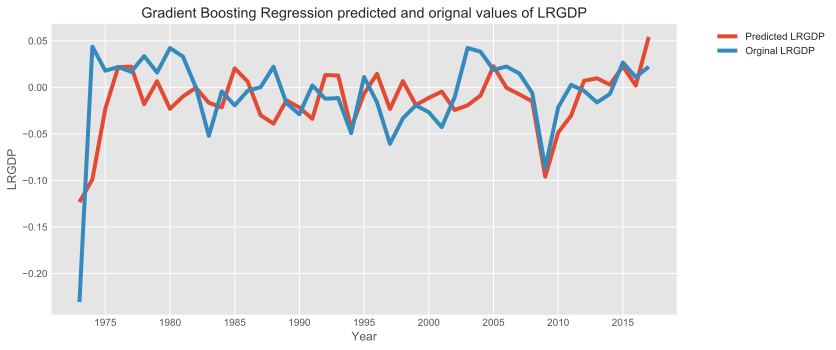

In [41]:
gbr = GradientBoostingRegressor(max_depth=5)#clf = LinearRegression(n_jobs=-1) #adr = AdaBoostRegressor()
gbr.fit(X_train, Y_train) #adr
forecast_set1 = gbr.predict(predictors) # can be one value or an array of values
print(forecast_set1)

plt.figure(figsize=(10,5))
line_up, = plt.plot(econ['dateid01'], forecast_set, label='Predicted LRGDP')
line_down, = plt.plot(econ['dateid01'], econ['dlrgdp'], label='Orginal LRGDP')
plt.legend(handles=[line_up, line_down])
plt.legend(bbox_to_anchor=(1, 0,0.25,1))
plt.title('Gradient Boosting Regression predicted and orignal values of LRGDP')
plt.xlabel('Year'), plt.ylabel('LRGDP')

*********************
# *********************

# Predictions (In-sample) by setting back the clock

Index(['dateid01', 'ddl', 'dfdi', 'dk', 'dlrgdp', 'dpc', 'drem', 'dsep',
       'dset', 'dt', 'lfi', 'linf', 'lrgdp', 'r', 'ses'],
      dtype='object')


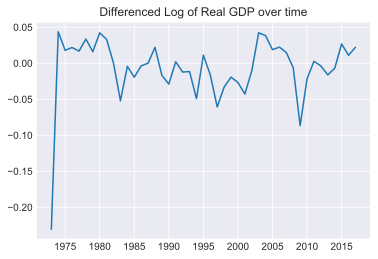

(31, 12) (31,) (14, 12) (14,)


In [82]:
pd.set_option('display.max_columns', None) 
econ = pd.read_excel('Data/final.xlsx', sheet_name="Sheet1", parse_dates=True)
econ = econ.dropna()

from sklearn import preprocessing
# Standarized X and centered Y
scaler = preprocessing.StandardScaler()
econ.loc[:,['ddl',	'dfdi',	'dk',	'dlrgdp',	'dpc',
            'drem',	'dsep',
            'dset',	'dt',	'lfi',	'linf',	'lrgdp',
            'r',	'ses']] = scaler.fit_transform(econ.loc[:,[ 'ddl',	'dfdi',	'dk',	'dlrgdp',
                                                               'dpc',	'drem',	'dsep',
                                                               'dset',	'dt',	'lfi',	'linf',	'lrgdp',
                                                               'r',	'ses']])

predictors = econ.loc[:,['ddl',	'dfdi',	'dk',	'dpc', 'drem',	'dsep', 'dset',	'dt',	'lfi',	'linf', 'r',	'ses']]
target = np.array(econ['dlrgdp'])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.30)
print (X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

dlrgdp
8
[-0.32544678 -0.4009179   0.0755544  -0.20644886  0.00095961  0.76557803
 -0.17918     0.14121172] -0.10909031783321232


(<matplotlib.legend.Legend at 0x1c222508c18>,
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Differenced LRGDP'))

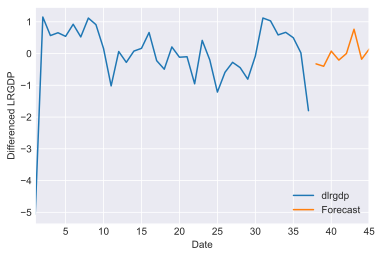

In [83]:
forecast_col = 'dlrgdp'
print( forecast_col)

forecast_out = int(math.ceil(0.16* len(econ))) #0.1 to predict prices from 10 days: using data that came 10 days to predict today
econ['label'] = econ[forecast_col].shift(-forecast_out) #shifting columns negatively/ shifted up. each row will be adjusted price 10 days into the future
print(forecast_out)

X_lately = predictors[-forecast_out:] #starting  from forecast out to beyon. stuff that we are going to predict against
predictors = predictors[:-forecast_out] # forecast out to the point of -forcast_out
econ.dropna(inplace=True) # needed as the econ['label'] has shifted the rows by -
target = np.array(econ['label'])

from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=5)
gbr.fit(X_train, Y_train) #adr
confidence = gbr.score(X_test, Y_test)

forecast_set = gbr.predict(X_lately) # can be one value or an array of values
print(forecast_set, confidence)

#we need to populate the new dates and the forecast values
#iterating through the forecast set and taking each forecast and day and setting those as the values in the dataframe.
#making the future features not a number

#X axix is the features/predictors and y axis are the labels/target. we dont have the date to predict on so we need to work around it
#econ['Forecast'] = econ.apply(lambda _: '', axis=1)
#econ['Forecast'] = pd.Series()
econ['Forecast'] = np.nan # making a column full of non num data- so we can put in data later one 
econ.tail()

#timestamp style fudges up the index in a combinaton or numbers and date. methods below is much better 

from datetime import datetime
lastdate = econ.iloc[-1].name
lastdate

n = 1
nextunix = lastdate + n

for i in forecast_set:
    nextdate = nextunix #next_date = datetime.fromtimestamp(next_unix)
    nextunix += n #next_unix += oneyear  #or the number
    econ.loc[nextdate] = [np.nan for _ in range(len(econ.columns)-1)]+ [i]
#econ.loc references the index of the datafrae
#last line takes all of the columns and sets them to not a number np.na .... to -1)
#final colum is what ever the i is: which here is the forecast

    
econ.tail(10)

econ['dlrgdp'].plot()
econ['Forecast'].plot()
plt.legend(loc=4), plt.xlabel('Date'), plt.ylabel('Differenced LRGDP')

*********************
# *********************